### Author : Saurabh

# Analysis of Shark Tank Data

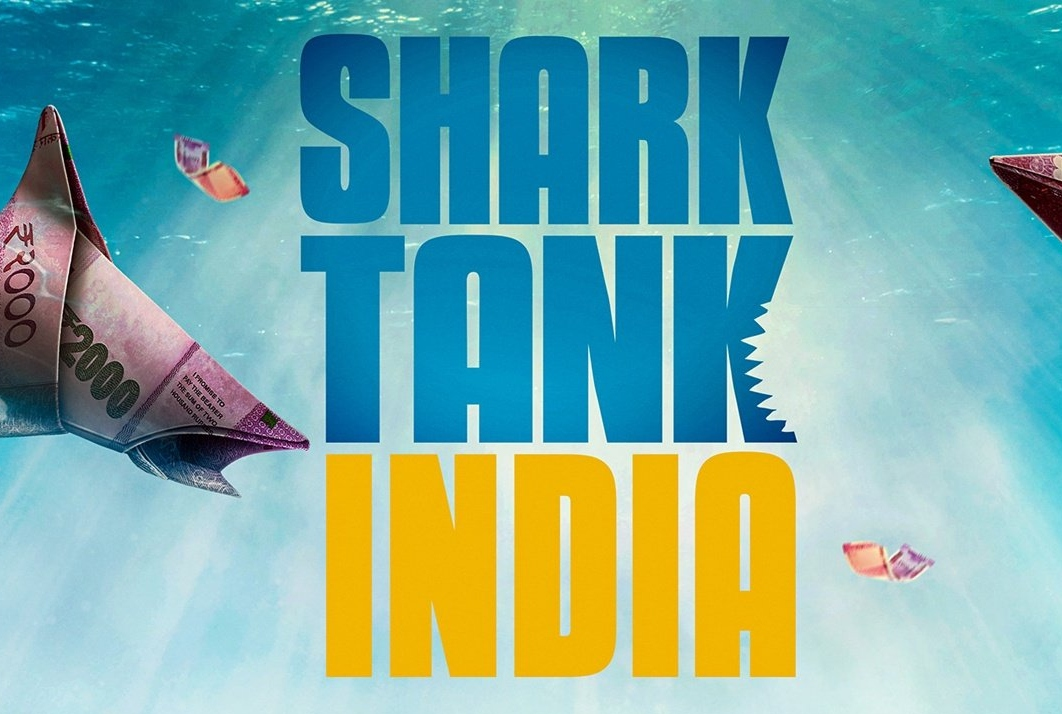

In [7]:
#Poster of Tag 
Image(path+"\\Sharkimgtitle.jpg",height=420,width=1000)

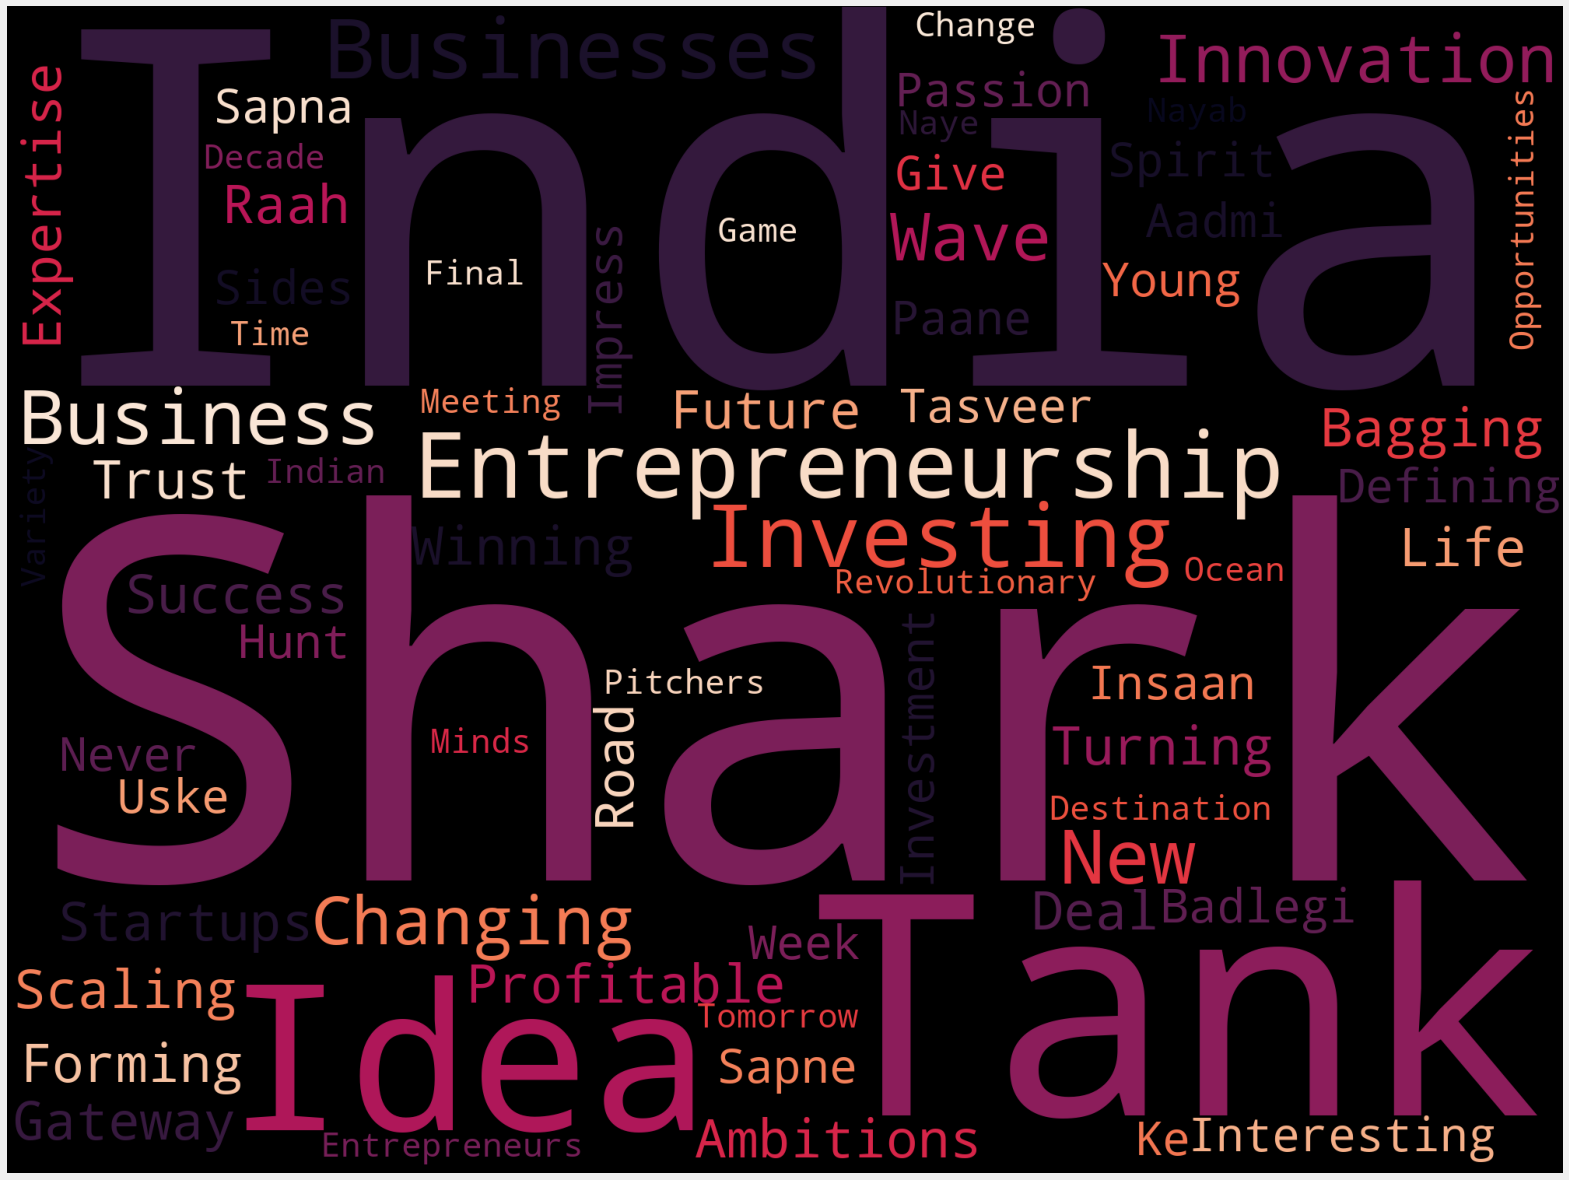

In [8]:
text =" Shark Tank India ".join(cat for cat in df['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko","Karne","Wale","Aam","Aur","Ek"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='rocket_r', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

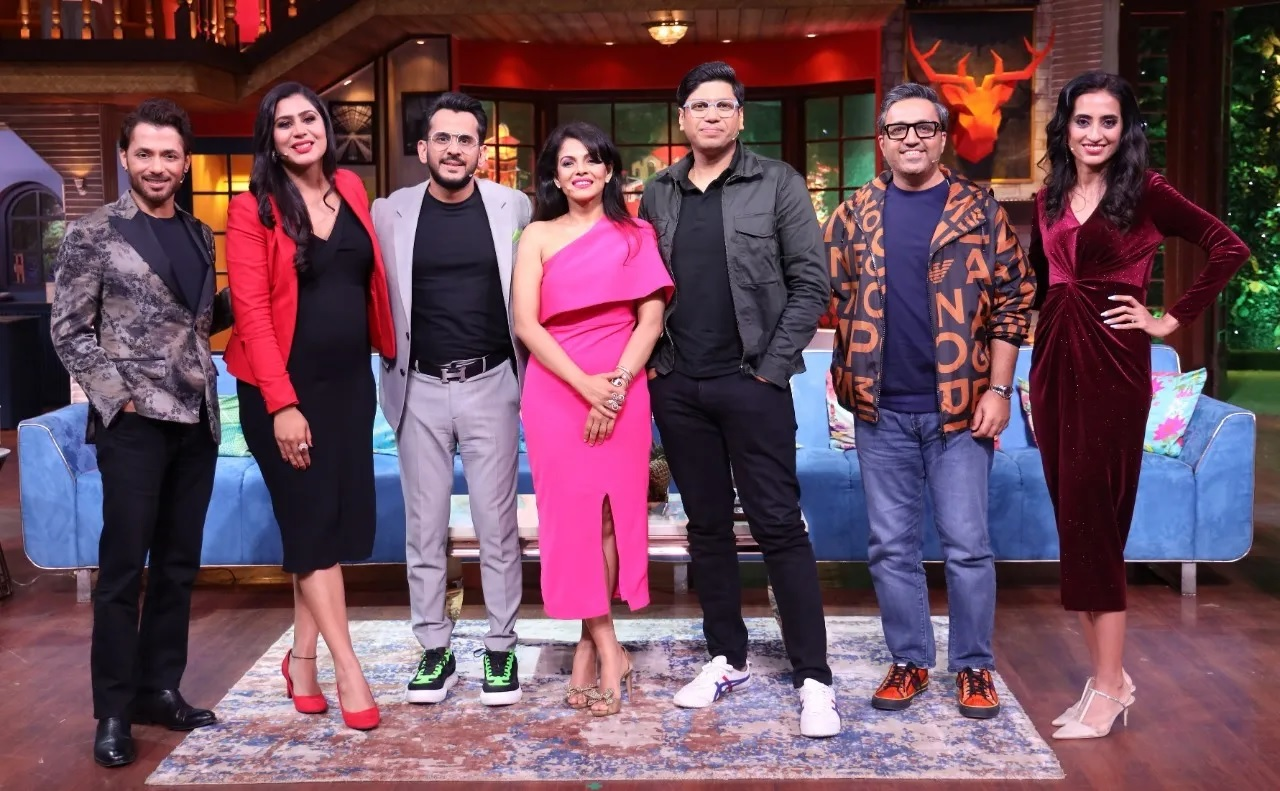

In [9]:
# Judges of Sharks Tank image:
Image(path+"\\Sharksimage.jpg")

In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Shark Tank Data Analysis'

In [2]:
path='E:\\DataScience\\MachineLearning\\Shark Tank Data Analysis'

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'Analysis.ipynb',
 'Project Approval Form BT3425.docx.pdf',
 'Shark Tank India.csv',
 'Sharkimgtitle.jpg',
 'Sharksimage.jpg',
 'Shark_Tank_India_data_SE_01.zip']

In [4]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import signal
from wordcloud import WordCloud, STOPWORDS
from babel.numbers import format_currency
import plotly.io as pio
pio.templates.default = "plotly_dark"

#to supress warning
import warnings
warnings.filterwarnings('ignore')

#to make shell more intractive
from IPython.display import display
from IPython.display import Image

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [106]:
df=pd.read_csv(path+"\\Shark Tank India.csv")

In [6]:
df.head(15).style.background_gradient(cmap = 'Oranges')

In [10]:
df['Male Presenters'] =   df['Male Presenters'].astype(pd.Int32Dtype())
df['Female Presenters'] = df['Female Presenters'].astype(pd.Int32Dtype())
df['Started in'] =        df['Started in'].astype(pd.Int32Dtype())
df['Yearly Revenue'] =    df['Yearly Revenue'].astype(pd.Int32Dtype())
df['Monthly Sales'] =     df['Monthly Sales'].astype(pd.Int32Dtype())
df['Valuation Offered'] = df['Valuation Offered'].astype(pd.Int32Dtype())

In [11]:
df.head(5)

Season Number  Episode Number                Episode Title  Pitch Number  \
0              1               1  Badlegi Business Ki Tasveer             1   
1              1               1  Badlegi Business Ki Tasveer             2   
2              1               1  Badlegi Business Ki Tasveer             3   
3              1               2      Insaan, Ideas Aur Sapne             4   
4              1               2      Insaan, Ideas Aur Sapne             5   

          Startup Name             Industry  \
0       BluePine Foods                 Food   
1        Booz Scooters  Electrical Vehicles   
2  Heart up my Sleeves       Beauty/Fashion   
3           Tagz Foods                 Food   
4       Head and Heart            Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Number of Presenters  Male Presenters  ...  \
0     https://bluepinefoods.com/                     3                2  ...   
1        https://www.boozup.net/                     1                1  ...   
2  https://heartupmysleeves.com/                     1             <NA>  ...   
3         https://tagzfoods.com/                     2                2  ...   
4             https://thehnh.in/                     4                1  ...   

   Aman Investment Amount  Aman Investment Equity Aman Debt Amount  \
0                    25.0                    5.33              NaN   
1                     0.0                    0.00              NaN   
2                     0.0                    0.00              NaN   
3                     0.0                    0.00              NaN   
4                     NaN                     NaN              NaN   

   Peyush Investment Amount Peyush Investment Equity Peyush Debt Amount  \
0                       NaN                      NaN                NaN   
1                       NaN                      NaN                NaN   
2                       NaN                      NaN                NaN   
3                       NaN                      NaN                NaN   
4                       NaN                      NaN                NaN   

   Ghazal Investment Amount  Ghazal Investment Equity  Ghazal Debt Amount  \
0                       NaN                       NaN                 NaN   
1                       NaN                       NaN                 NaN   
2                       NaN                       NaN                 NaN   
3                       NaN                       NaN                 NaN   
4                       NaN                       NaN                 NaN   

   Number of sharks in deal  
0                       3.0  
1                       2.0  
2                       2.0  
3                       1.0  
4                       NaN  

[5 rows x 50 columns]

In [12]:
df.shape

(121, 50)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Company Website            49 non-null     object 
 8   Number of Presenters       121 non-null    int64  
 9   Male Presenters            102 non-null    Int32  
 10  Female Presenters          62 non-null     Int32  
 11  Couple Presenters          102 non-null    float64
 12  Pitchers Average Age       55 non-null     object 
 13  Started in                 65 non-null     Int32  

In [14]:
df.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [15]:
df.columns

Index(['Season Number', 'Episode Number', 'Episode Title', 'Pitch Number',
       'Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Original Ask Amount', 'Original Ask Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Valuation Offered', 'Ashneer Investment Amount',
       'Ashneer Investment Equity', 'Ashneer Debt Amount',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Anupam Investment Amount',
       'Anupam Investment Equity', 'Anupam Debt Amount',
       'Vineeta Investment Amount', 'Vineeta Investment Equity',
       'Vineeta Debt Amount', 'Aman Investment Amount',
       'Aman Inv

## Some Facts of Shark Tank Data

In [16]:
print("Shark Tank Episodes are Boradcasted on SonyLiv OTT Platform")
print("Season :",df['Season Number'].max())
print("Total number of Episodes in Covered:",df['Episode Number'].max())
print("Total number of Pitch  :",df['Pitch Number'].max())

Shark Tank Episodes are Boradcasted on SonyLiv OTT Platform
Season : 1
Total number of Episodes in Covered: 36
Total number of Pitch  : 121


In [17]:
df['Industry'].value_counts()

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64

In [18]:
df['Industry'].value_counts().index

Index(['Food', 'Beauty/Fashion', 'Manufacturing', 'Technology', 'Education',
       'Services', 'Medical', 'Electrical Vehicles', 'Animal/Pets', 'Hardware',
       'Sports'],
      dtype='object')

In [19]:
fig = px.bar(df,x=df['Industry'].value_counts().index,y=df['Industry'].value_counts(),
             color=df['Industry'].value_counts().index,title="Types of Industry")
fig.update_xaxes(title_text='Industry')
fig.update_yaxes(title_text='No. of Startsups in those Sector')
fig.show()

In [20]:
print("Total number of  Presenters :",df['Number of Presenters'].sum(),"\n")
print("Total number of Male Presenters :",df['Male Presenters'].sum(),"\n")
print("Total number of Female Presenters :",df['Female Presenters'].sum(),"\n")
print("Male Entrepreneurs % :",round(df['Male Presenters'].sum()/df['Number of Presenters'].sum()*100, 0),"\n")
print("Female Entrepreneurs % :",round(df['Female Presenters'].sum()/df['Number of Presenters'].sum()*100, 0),"\n")

Total number of  Presenters : 251 

Total number of Male Presenters : 176 

Total number of Female Presenters : 75 

Male Entrepreneurs % : 70.0 

Female Entrepreneurs % : 30.0 



In [21]:
print("Total number of Couple  Presenters :",df['Couple Presenters'].sum(),"\n")
print("Couple Entrepreneurs % :",round(df['Couple Presenters'].sum()/df['Number of Presenters'].sum()*100, 0),"\n")

Total number of Couple  Presenters : 17.0 

Couple Entrepreneurs % : 7.0 



In [22]:
print(df['Pitchers State'].value_counts())
fig = px.bar(df,x=df['Pitchers State'].value_counts().index,y=df['Pitchers State'].value_counts(),
             color=df['Pitchers State'].value_counts().index,title="Pitchers State")
fig.update_xaxes(title_text='State')
fig.update_yaxes(title_text='No. of Startups')
fig.show()

Maharashtra               26
Delhi                     13
Gujarat                   11
Karnataka                  6
Telangana                  5
West Bengal                4
Uttar Pradesh              4
Punjab                     2
Jammu & Kashmir            2
Tamil Nadu                 2
Kerala                     2
Goa                        1
Maharashtra, Delhi         1
Punjab, Delhi              1
Madhya Pradesh             1
Karnataka, West Bengal     1
Rajasthan                  1
Uttarakhand                1
Haryana                    1
Bihar                      1
Name: Pitchers State, dtype: int64


In [23]:
fig = px.pie(df, values=df['Pitchers State'].value_counts(), names=df['Pitchers State'].value_counts().index
             , title='State % Share of Entrepreneurs:')
fig.show()

In [24]:
#Average age type value count
df['Pitchers Average Age'].value_counts()

Middle    34
Young     20
Old        1
Name: Pitchers Average Age, dtype: int64

In [25]:
# Most of the Avg age of Entrepreneurs is null 
df['Pitchers Average Age'].isnull().sum()

66

In [26]:
## top 20 city from where the most pitches came..
df['Pitchers City'].value_counts().nlargest(20)

Mumbai                14
Delhi                 13
Pune                   6
Hyderabad              5
Ahmedabad              5
Bangalore              5
Kolkata                4
Thiruvananthapuram     2
Gandhinagar            2
Surat                  2
Nagpur                 2
Jammu                  2
Mohali,Delhi           1
Jalna                  1
Malegaon               1
Vadodara               1
Valsad                 1
Pune, Delhi            1
Modinagar              1
Jaipur                 1
Name: Pitchers City, dtype: int64

In [42]:
fig = px.pie(df, values=df['Pitchers City'].value_counts().nlargest(15), names=df['Pitchers City'].value_counts().nlargest(15).index
             , title='Startup Distribution Top 15 Cities ')
fig.show()

In [28]:
print(df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))
fig = px.bar(df,x=df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15).index,y=df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15),
             color=df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15).index,title="Top 15 Startups which generates highest Revenue [in Lakhs]")
fig.update_xaxes(title_text='Startups')
fig.update_yaxes(title_text='Yearly Revenue (lakhs)')
fig.show()

Startup Name
French Crown          7200
Guardian Gears        2500
Raising Superstars    1300
PlayBoxTV             1020
Alpino                1000
Hammer Lifestyle      1000
Shades of Spring       900
Tagz Foods             700
Devnagri               500
Moonshine              372
Ariro                  300
PDD Falcon             272
Kabaddi Adda           250
RoadBounce             250
Humpy A2               208
Name: Yearly Revenue, dtype: Int32


In [29]:
print(df.groupby('Startup Name')['Gross Margin'].max().nlargest(15))
fig = px.bar(df,x=df.groupby('Startup Name')['Gross Margin'].max().nlargest(15).index,y=df.groupby('Startup Name')['Gross Margin'].max().nlargest(15),
             color=df.groupby('Startup Name')['Gross Margin'].max().nlargest(15).index,title="Top 15 Startups which have highest Gross Margin [in Lakhs]")
fig.update_xaxes(title_text='Startups')
fig.update_yaxes(title_text='Gross Margin (lakhs/Yearly)')
fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
Auli                   80.0
Cos IQ                 75.0
Thea and Sid           75.0
Bummer                 70.0
French Crown           70.0
Moonshine              70.0
Nomad Food Project     70.0
Nuutjob                70.0
Get-A-Whey             69.0
The Sass Bar           65.0
Hair Originals         62.0
Let's Try              55.0
Name: Gross Margin, dtype: float64


In [30]:
print(df.groupby('Startup Name')['Monthly Sales'].max().nlargest(15))
fig = px.bar(df,x=df.groupby('Startup Name')['Monthly Sales'].max().nlargest(15).index,y=df.groupby('Startup Name')['Monthly Sales'].max().nlargest(15),
             color=df.groupby('Startup Name')['Monthly Sales'].max().nlargest(15).index,title="Top 15 Startups which have highest Gross Margin [in Millons]")
fig.update_xaxes(title_text='Startups')
fig.update_yaxes(title_text='Monthly Sales')
fig.show()

Startup Name
Urban Monkey          20000000
Kabira Handmad        16000000
Hair Originals         5000000
The State Plate        4000000
Gopal's 56             3300000
Get-A-Whey             3000000
Kunafa World           3000000
Ariro                  2500000
Insurance Samadhan     2200000
Guardian Gears         2100000
Beyond Snack           2060000
Bamboo India           2000000
NOCD                   2000000
PawsIndia              2000000
Astrix                 1800000
Name: Monthly Sales, dtype: Int32


Season Number                  0
Episode Number                 0
Episode Title                  0
Pitch Number                   0
Startup Name                   0
Industry                       0
Business Description           0
Company Website               72
Number of Presenters           0
Male Presenters               19
Female Presenters             59
Couple Presenters             19
Pitchers Average Age          66
Started in                    56
Pitchers City                 36
Pitchers State                35
Yearly Revenue                72
Monthly Sales                 60
Gross Margin                  86
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                33
Total Deal Amount             54
Total Deal Equity             54
Total Deal Debt              112
Valuation Offered             54
Ashneer Investment Amount     67
Ashneer Investment Equity     67
Ashneer De

<AxesSubplot:>

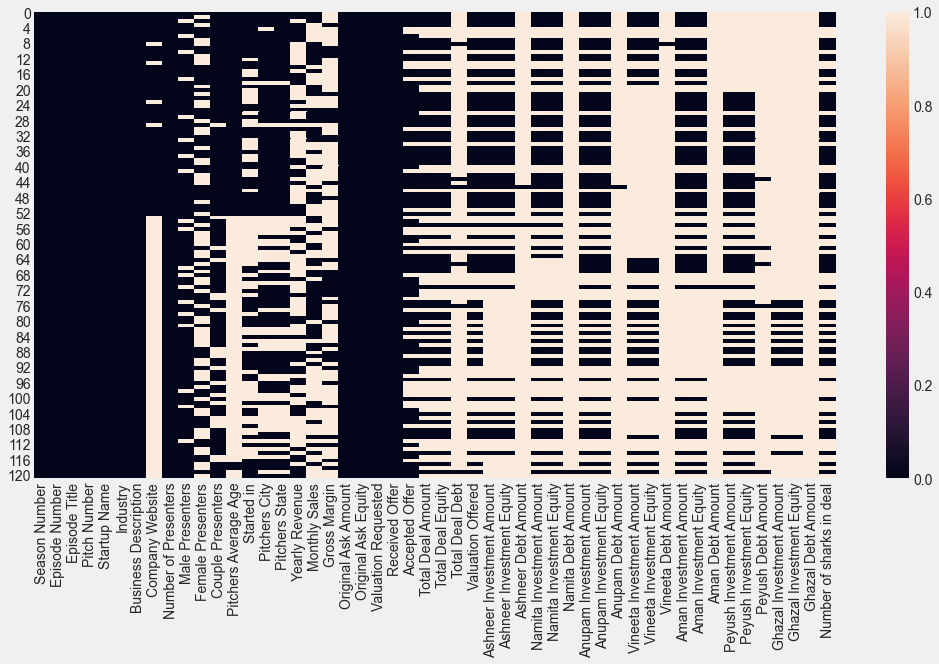

In [31]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [33]:
print(df.groupby('Startup Name')['Original Ask Amount'].max().nlargest(15))

Startup Name
Gopal's 56            30000.0
Shades of Spring        300.0
ExperentialEtc          200.0
Aas Vidyalaya           150.0
Alpino                  150.0
French Crown            150.0
Keto India              150.0
Magic lock              120.0
Devnagri                100.0
Elcare India            100.0
Get-A-Whey              100.0
Hecoll                  100.0
Insurance Samadhan      100.0
Kabira Handmad          100.0
Morriko Pure Foods      100.0
Name: Original Ask Amount, dtype: float64


In [34]:
fig = px.bar(df,x=df.groupby('Startup Name')['Original Ask Amount'].max().nlargest(15).index,y=df.groupby('Startup Name')['Original Ask Amount'].max().nlargest(15),
             color=df.groupby('Startup Name')['Original Ask Amount'].max().nlargest(15).index,title="Top 15 Startups which ask for highest amount [in Lakhs]")
fig.update_xaxes(title_text='Startups')
fig.update_yaxes(title_text='Original Ask Amount')
fig.show()

In [40]:
#Total Shark Deal:
total_shark=df[df["Number of sharks in deal"]==5]
figure=px.bar(total_shark, x='Startup Name', y='Total Deal Amount',title="Five Shark Deal Brands and the total investment:",text_auto=True, color='Original Ask Amount',
                    template="plotly_dark")
figure.show()

In [50]:
print(df.groupby('Startup Name')['Original Ask Amount'].min().nsmallest(15))

Startup Name
Cocofit                 0.00005
Watt Technovations      0.00101
Ethik                  15.00000
Nuskha Kitchen         20.00000
Shrawani Engineers     20.00000
SneaKare               20.00000
Heart up my Sleeves    25.00000
Nuutjob                25.00000
Annie                  30.00000
EventBeep              30.00000
Farda                  30.00000
Guardian Gears         30.00000
Hammer Lifestyle       30.00000
KG Agrotech            30.00000
Meatyour               30.00000
Name: Original Ask Amount, dtype: float64


In [51]:
fig = px.bar(df,x=df.groupby('Startup Name')['Original Ask Amount'].min().nsmallest(15).index,y=df.groupby('Startup Name')['Original Ask Amount'].max().nlargest(15),
             color=df.groupby('Startup Name')['Original Ask Amount'].min().nsmallest(15).index,title="Top 15 Startups which ask for lowest amount [in Lakhs]")
fig.update_xaxes(title_text='Startups')
fig.update_yaxes(title_text='Original Ask Amount')
fig.show()

In [77]:
#Ask Equity and Deal Equity of Highest Pitch Ask AMount Brand
figure=px.bar(df, x='Startup Name', y='Original Ask Equity',title="Ask Equity & Deal Equity of Highest Pitch Ask Amount Brand:",text_auto=True, color='Total Deal Equity',)
figure.show()

In [91]:
 #the number of investments done by individual shark
Ashneer_amount=df.loc[(df["Ashneer Investment Amount"].isnull()==False)&(df["Ashneer Investment Amount"]!=0)]
Namita_amount=df.loc[(df["Namita Investment Amount"].isnull()==False)&(df["Namita Investment Amount"]!=0)]
Anupam_amount=df.loc[(df["Anupam Investment Amount"].isnull()==False)&(df["Anupam Investment Amount"]!=0)]
Vineeta_amount=df.loc[(df["Vineeta Investment Amount"].isnull()==False)&(df["Vineeta Investment Amount"]!=0)]
Aman_amount=df.loc[(df["Aman Investment Amount"].isnull()==False)&(df["Aman Investment Amount"]!=0)]
Peyush_amount=df.loc[(df["Peyush Investment Amount"].isnull()==False)&(df["Peyush Investment Amount"]!=0)]
Ghazal_amount=df.loc[(df["Ghazal Investment Amount"].isnull()==False)&(df["Ghazal Investment Amount"]!=0)]

In [92]:
print("-"*60,"\n","Ashneer invested in",len(Ashneer_amount),"number of business in the season.")
print("Namita invested in",len(Namita_amount),"number of business in the season.")
print("Anupam invested in",len(Anupam_amount),"number of business in the season.")
print("Vineeta invested in",len(Vineeta_amount),"number of business in the season.")
print("Aman invested in",len(Aman_amount),"number of business in the season.")
print("Peyush invested in",len(Peyush_amount),"number of business in the season.")
print("Ghazal invested in",len(Ghazal_amount),"number of business in the season.","\n","-"*60)

------------------------------------------------------------ 
 Ashneer invested in 21 number of business in the season.
Namita invested in 24 number of business in the season.
Anupam invested in 24 number of business in the season.
Vineeta invested in 16 number of business in the season.
Aman invested in 29 number of business in the season.
Peyush invested in 28 number of business in the season.
Ghazal invested in 7 number of business in the season. 
 ------------------------------------------------------------


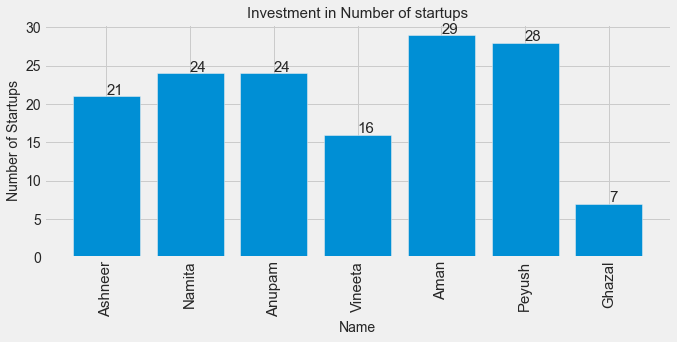

In [107]:
startup_count=[len(Ashneer_amount),len(Namita_amount),len(Anupam_amount),len(Vineeta_amount),len(Aman_amount),len(Peyush_amount),len(Ghazal_amount)]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
dfa= {'Name':name,'Startup_count':startup_count}
plt.figure(figsize=(10,4))
plt.bar(dfa['Name'],dfa['Startup_count'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Number of Startups",fontsize=14)
for index,d in enumerate(startup_count):
    plt.text(x=index , y =d+0.2 , s=f"{d}" , fontdict=dict(fontsize=15))
#plt.tight_layout()
plt.title("Investment in Number of startups",fontsize=15)
plt.show()

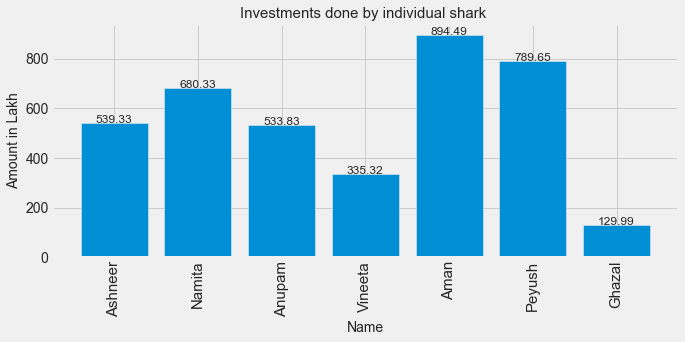

In [108]:
#the investments  amount done by individual shark
startup_count=[Ashneer_amount["Ashneer Investment Amount"].sum(),Namita_amount["Namita Investment Amount"].sum(),Anupam_amount["Anupam Investment Amount"].sum(),Vineeta_amount["Vineeta Investment Amount"].sum(),Aman_amount["Aman Investment Amount"].sum(),Peyush_amount["Peyush Investment Amount"].sum(),Ghazal_amount["Ghazal Investment Amount"].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
dfa = {'Name':name,'Startup_count':startup_count}
plt.figure(figsize=(10,4))
plt.bar(dfa['Name'],dfa['Startup_count'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Amount in Lakh",fontsize=14)
for index,d in enumerate(startup_count):
    plt.text(x=index , y =d+1 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Investments done by individual shark ",fontsize=15)
plt.show()

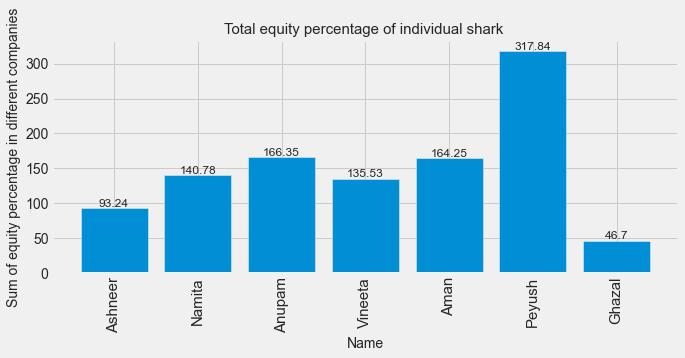

In [102]:
#equity %
equity=[df['Ashneer Investment Equity'].sum(), df['Namita Investment Equity'].sum(), df['Anupam Investment Equity'].sum(), df['Vineeta Investment Equity'].sum(),
    df['Aman Investment Equity'].sum(), df['Peyush Investment Equity'].sum(), df['Ghazal Investment Equity'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name,'Total equity':equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'],df['Total equity'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Sum of equity percentage in different companies",fontsize=14)
for index,d in enumerate(equity):
    plt.text(x=index , y =d+2 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Total equity percentage of individual shark ",fontsize=15)
plt.show()

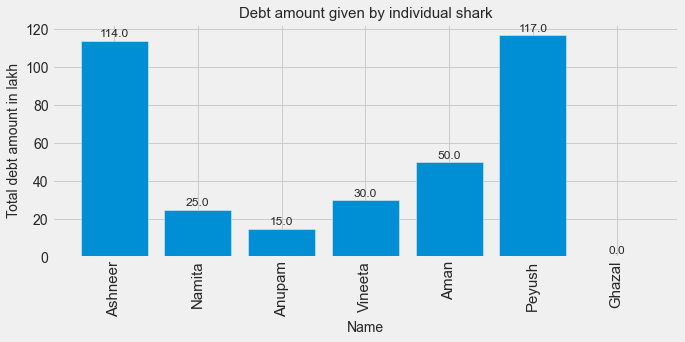

In [110]:
#investment based on the  Debt and loaned Amount
debt=[df['Ashneer Debt Amount'].sum(), df['Namita Debt Amount'].sum(), df['Anupam Debt Amount'].sum(), df['Vineeta Debt Amount'].sum(),
    df['Aman Debt Amount'].sum(), df['Peyush Debt Amount'].sum(), df['Ghazal Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
dfa = {'Name':name,'Total debt':debt }
plt.figure(figsize=(10,4))
plt.bar(dfa['Name'],dfa['Total debt'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Total debt amount in lakh",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index , y =d+2 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Debt amount given by individual shark",fontsize=15)
plt.show()

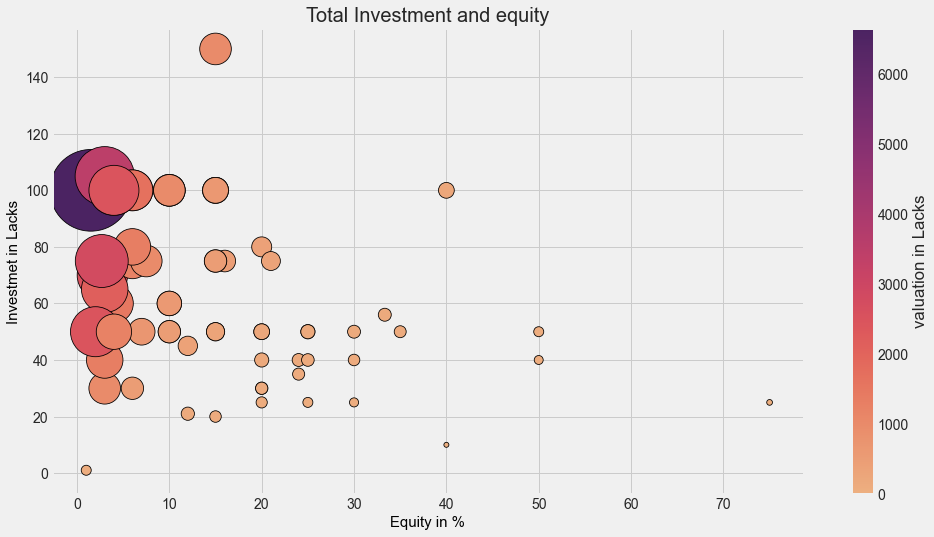

In [111]:
#
DealDone=df.loc[df["Accepted Offer"]==1]

fig = plt.figure(figsize=(15,8))    

plt.subplot()
plt.scatter("Total Deal Equity","Total Deal Amount",data=DealDone,s="Valuation Offered",c="Valuation Offered",cmap="flare",edgecolor="k",linewidths=.8)

plt.title("Total Investment and equity",fontsize=20)
plt.xlabel("Equity in %",fontsize=15,color="k")
plt.ylabel("Investmet in Lacks",fontsize=15,color="k")
plt.colorbar(label="valuation in Lacks")

## Ashneer's Investment Analysis

Text(0.5, 0.98, "Ashneer's Investment Analysis")

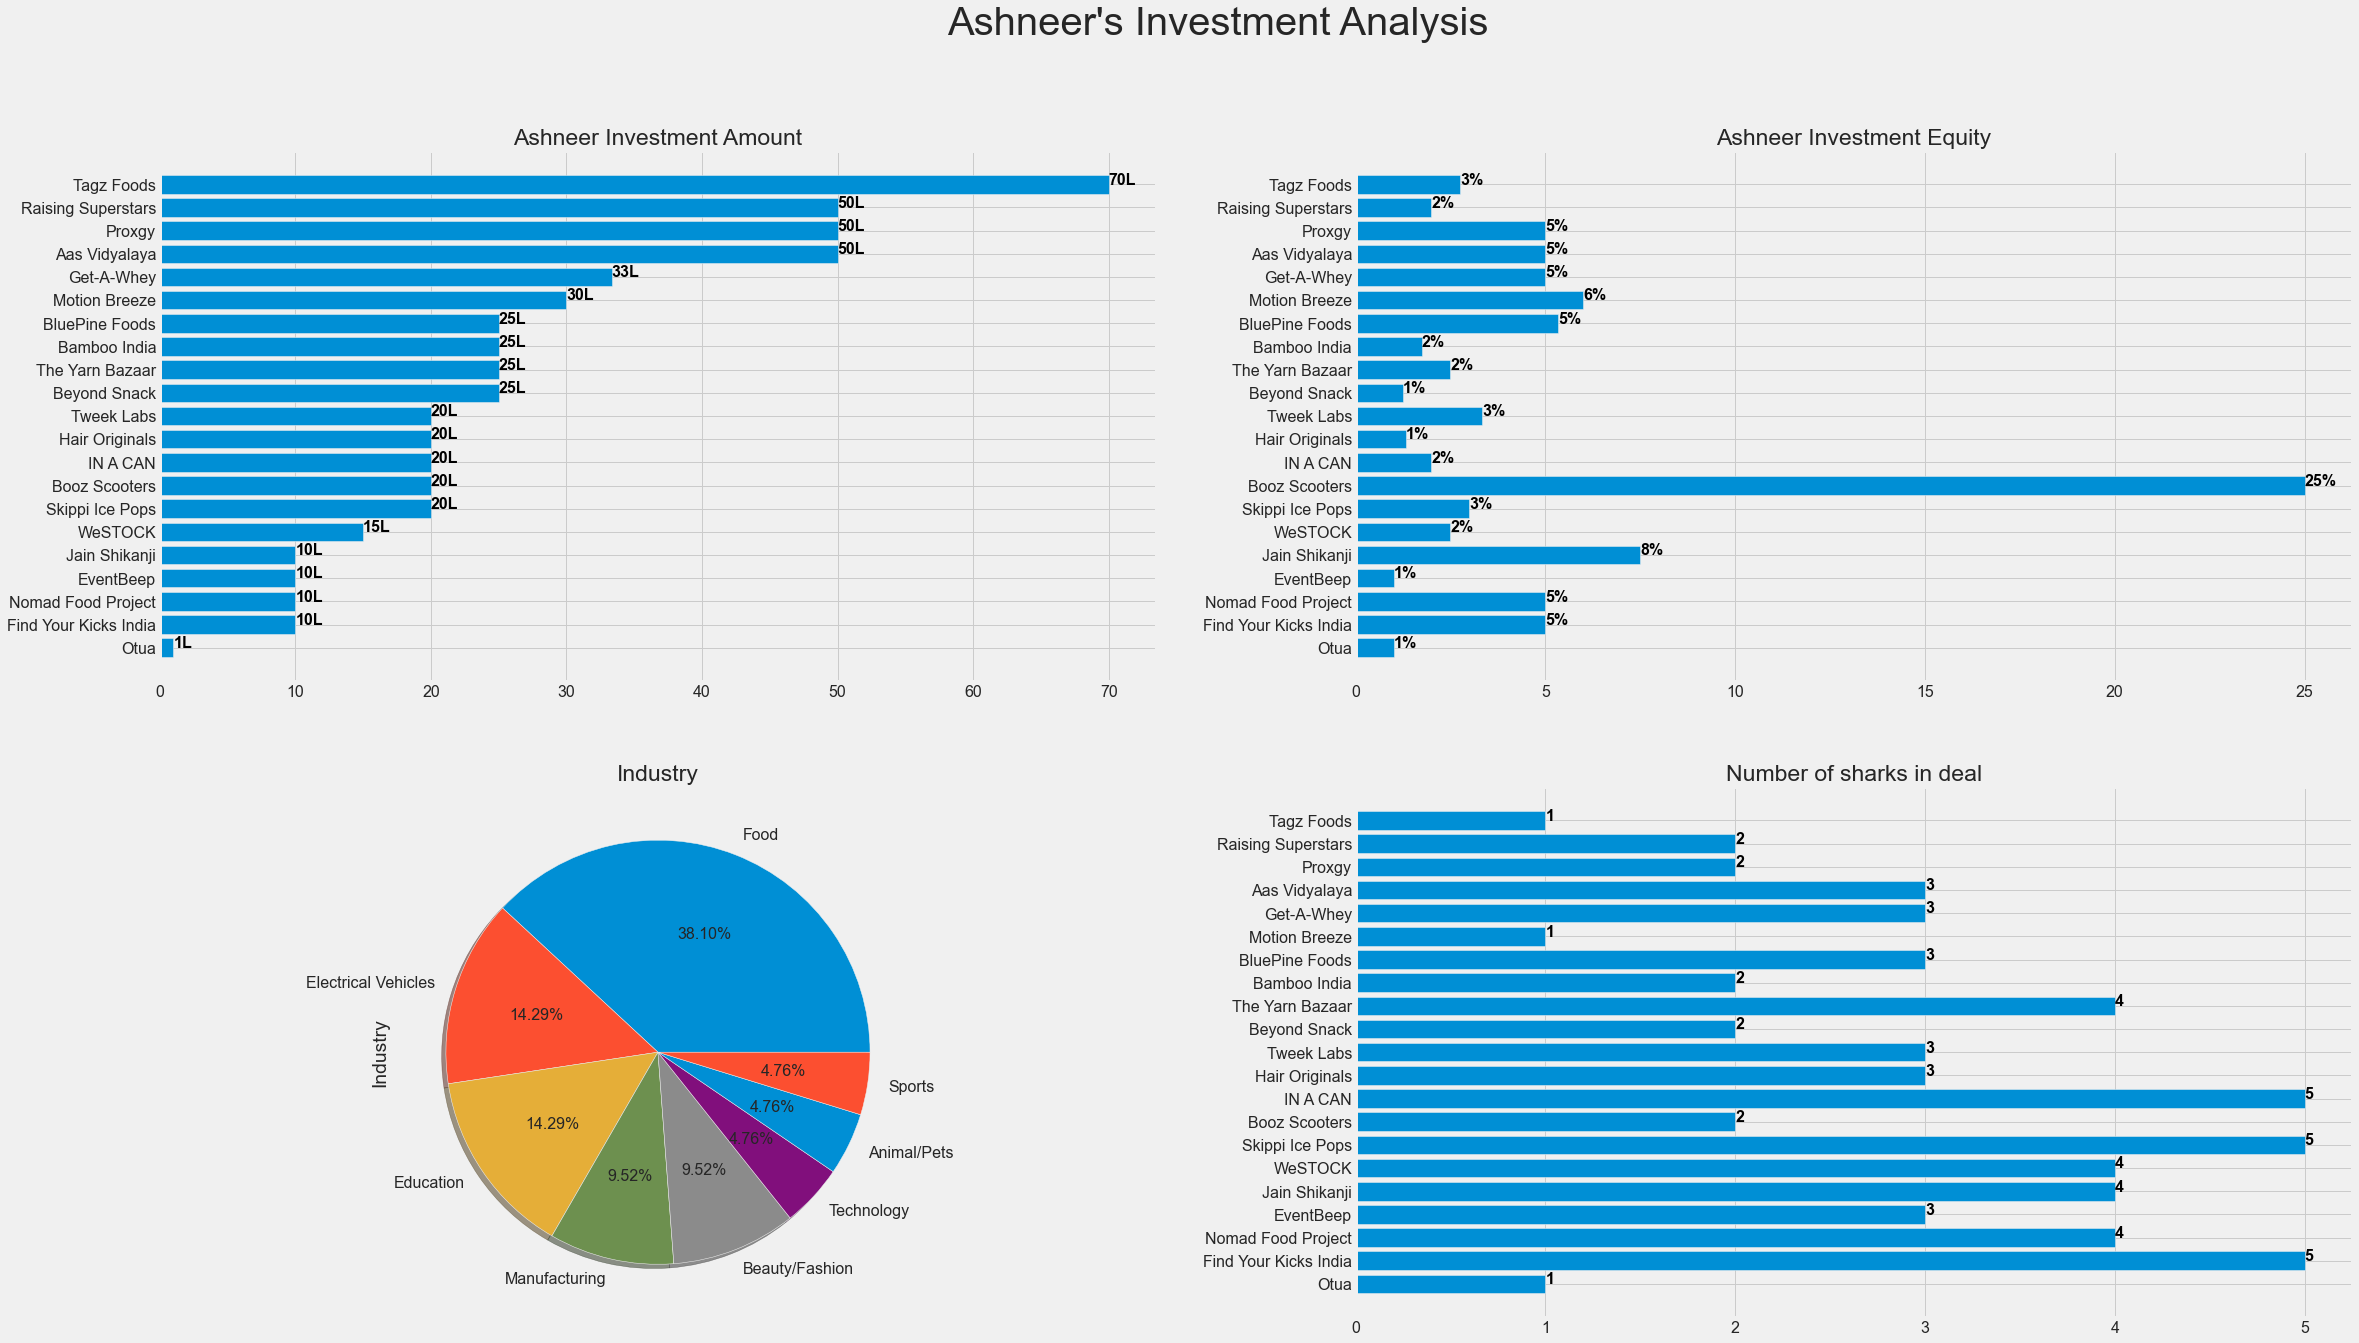

In [112]:
## Ashneer's Investment Analysis
Ashneer = Ashneer_amount.sort_values('Ashneer Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Ashneer["Startup Name"],Ashneer["Ashneer Investment Amount"])
for i, v in enumerate(Ashneer["Ashneer Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Ashneer Investment Amount")
plt.subplot(2,2,2)
plt.barh(Ashneer["Startup Name"],Ashneer["Ashneer Investment Equity"])
for i, v in enumerate(Ashneer["Ashneer Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Ashneer Investment Equity")
plt.subplot(2,2,3)
Ashneer["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Ashneer["Startup Name"],Ashneer["Number of sharks in deal"])
for i, v in enumerate(Ashneer["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Ashneer's Investment Analysis",fontsize=40)

## Namita Investment Analysis

Text(0.5, 0.98, "Namita's Investment Analysis")

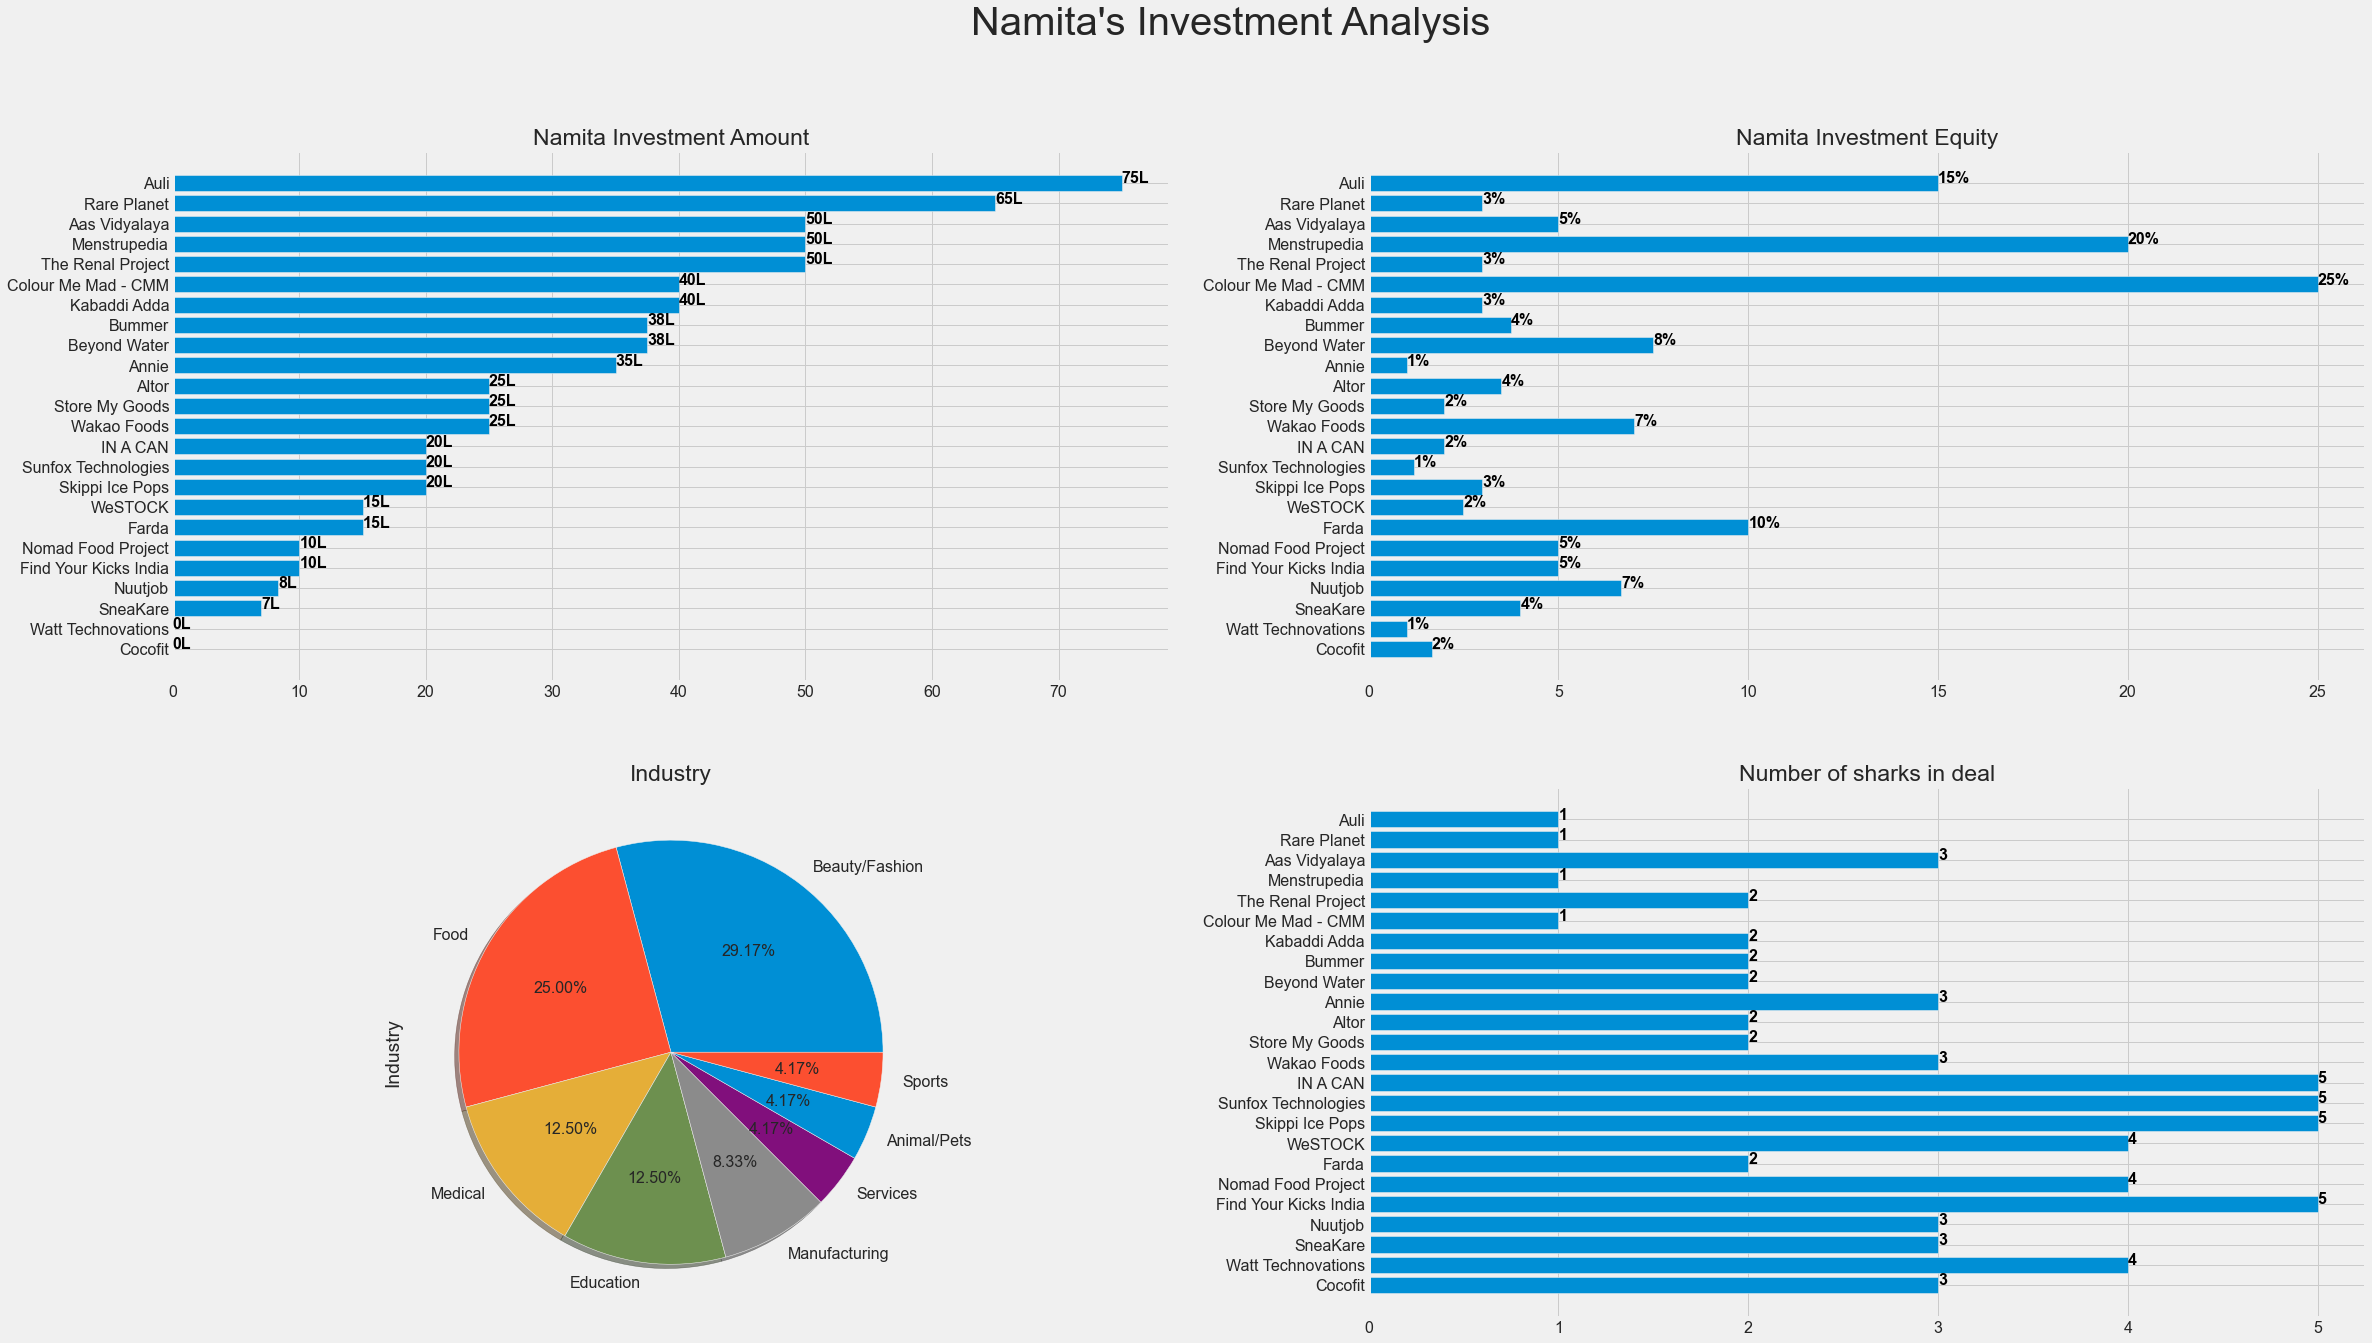

In [113]:
Namita = Namita_amount.sort_values('Namita Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Namita["Startup Name"],Namita["Namita Investment Amount"])
for i, v in enumerate(Namita["Namita Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Namita Investment Amount")
plt.subplot(2,2,2)
plt.barh(Namita["Startup Name"],Namita["Namita Investment Equity"])
for i, v in enumerate(Namita["Namita Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Namita Investment Equity")
plt.subplot(2,2,3)
Namita["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Namita["Startup Name"],Namita["Number of sharks in deal"])
for i, v in enumerate(Namita["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Namita's Investment Analysis",fontsize=40)

## Anupam Investment Analysis

Text(0.5, 0.98, "Anupam's Investment Analysis")

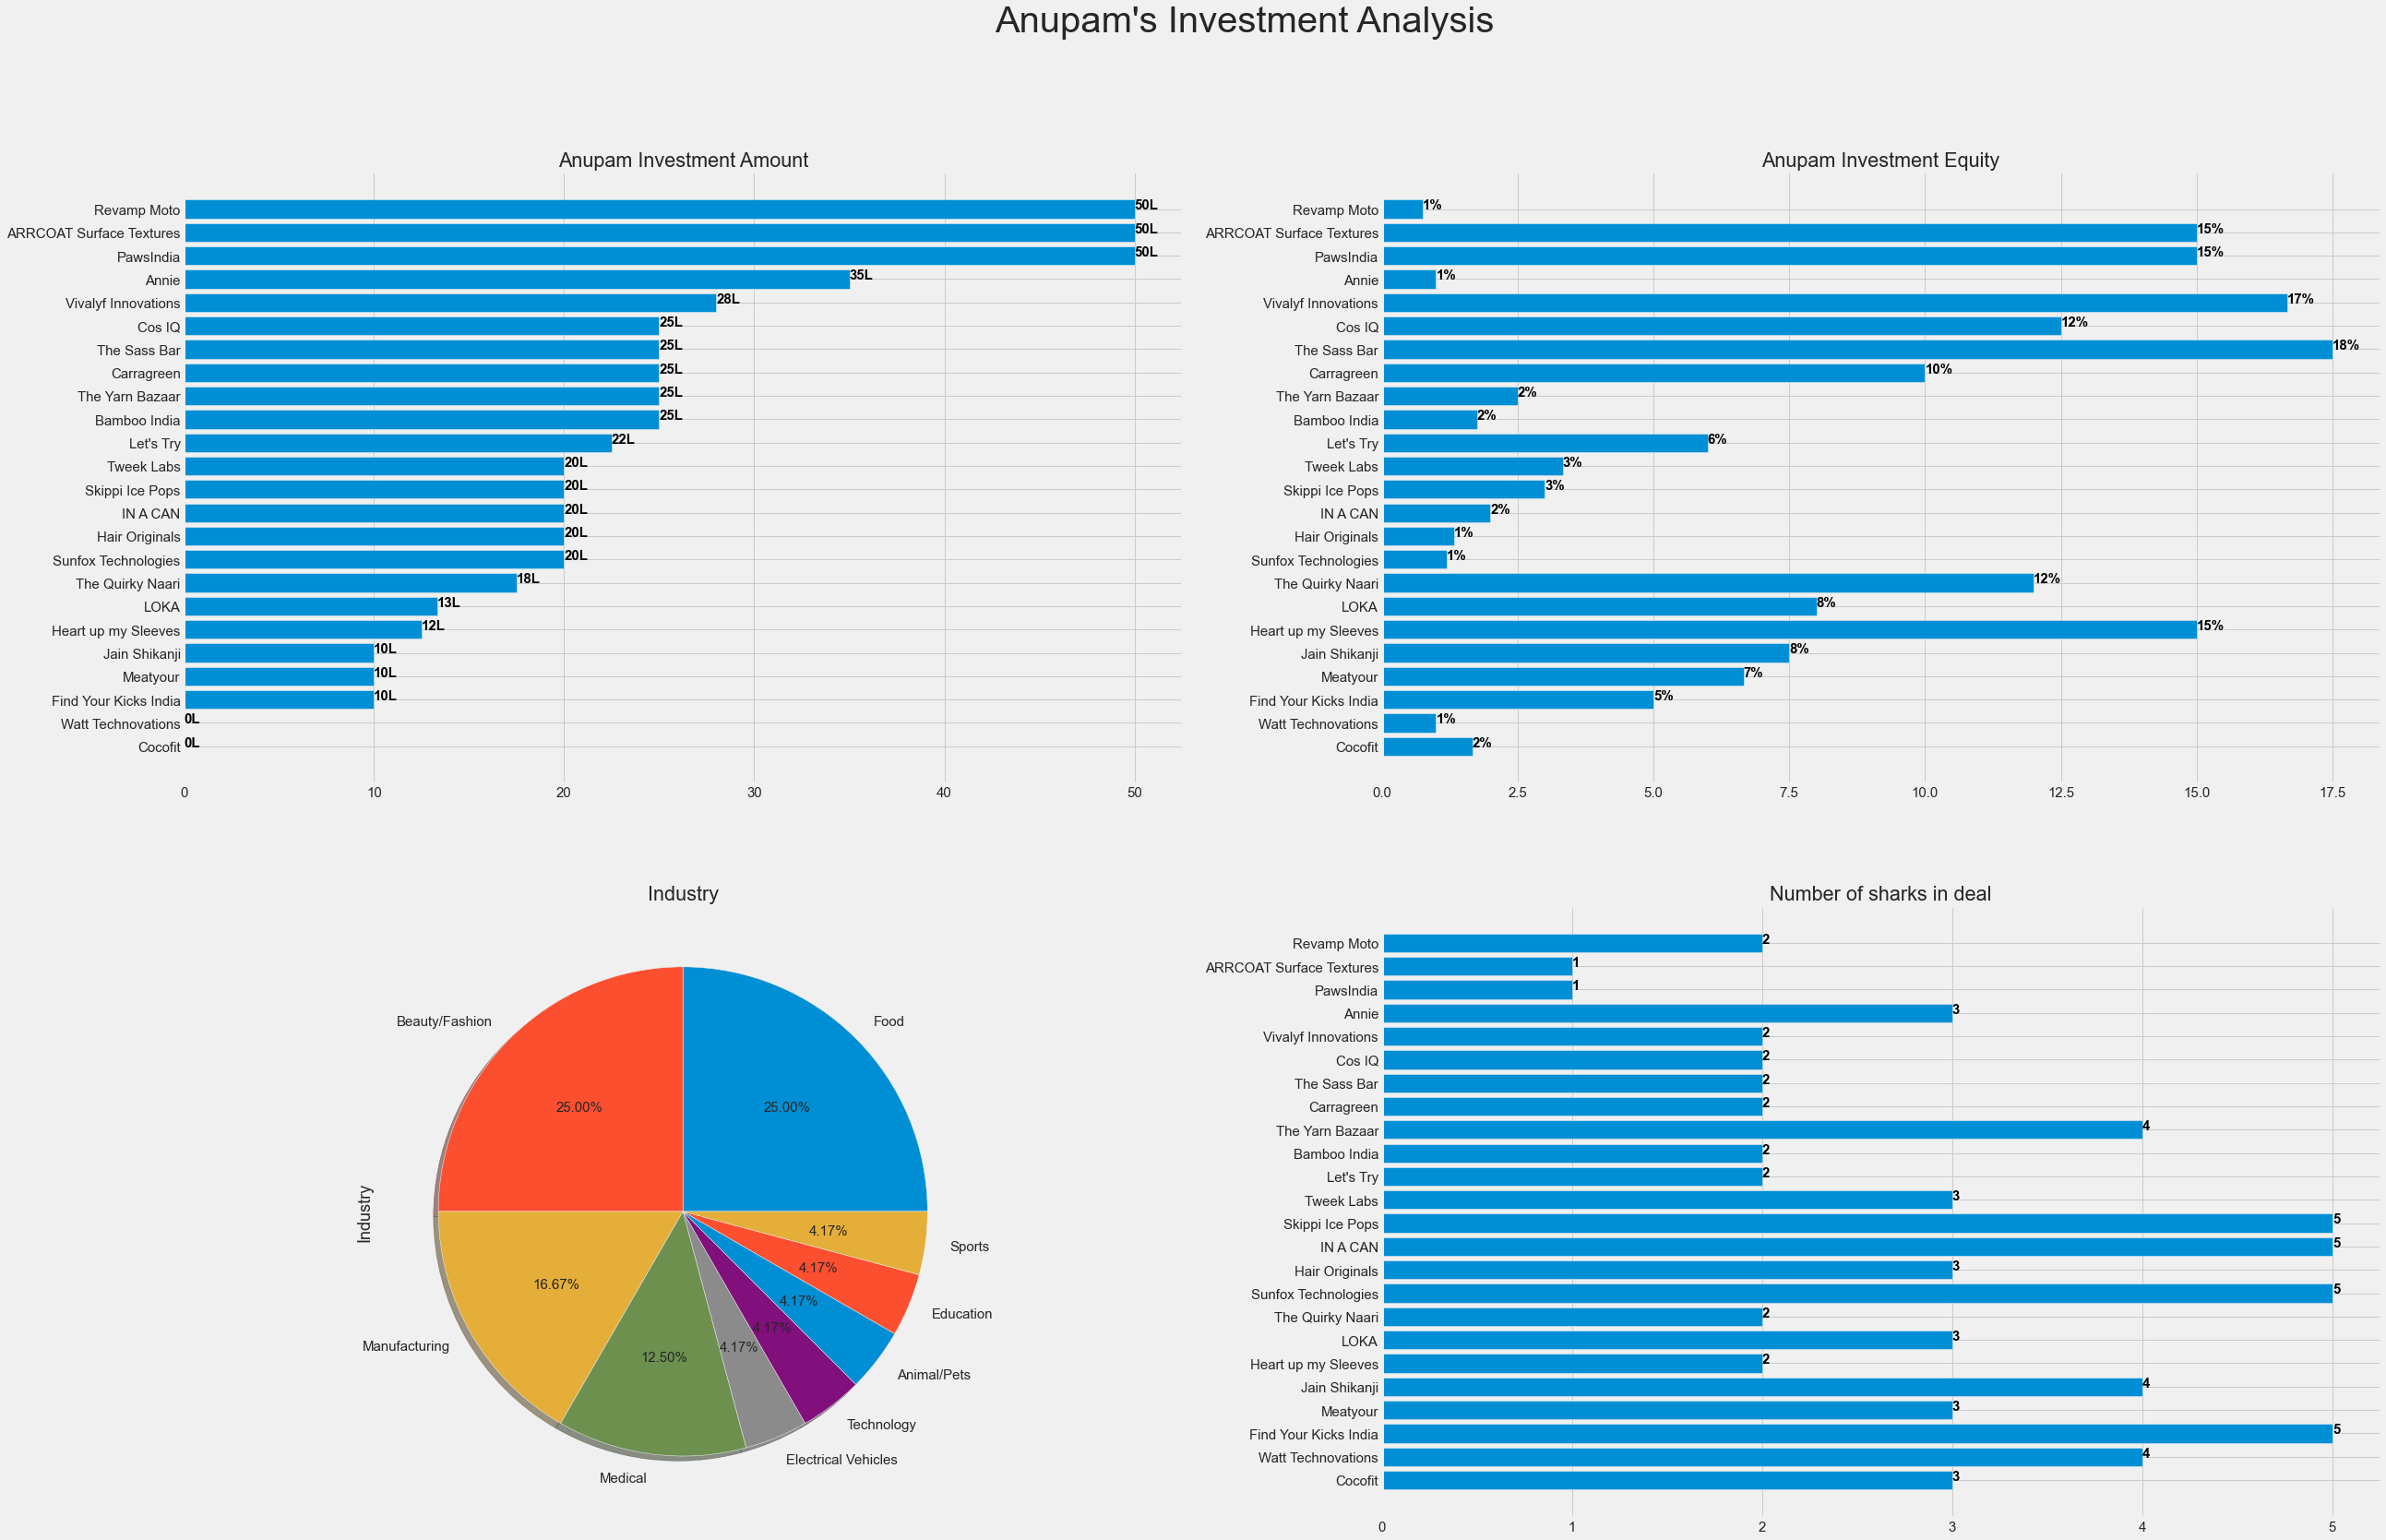

In [114]:
Anupam = Anupam_amount.sort_values('Anupam Investment Amount')
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(38,25))
plt.subplot(2,2,1)
plt.barh(Anupam["Startup Name"],Anupam["Anupam Investment Amount"])
for i, v in enumerate(Anupam["Anupam Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Anupam Investment Amount")
plt.subplot(2,2,2)
plt.barh(Anupam["Startup Name"],Anupam["Anupam Investment Equity"])
for i, v in enumerate(Anupam["Anupam Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Anupam Investment Equity")
plt.subplot(2,2,3)
Anupam["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Anupam["Startup Name"],Anupam["Number of sharks in deal"])
for i, v in enumerate(Anupam["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Anupam's Investment Analysis",fontsize=40)

## 'Vineeta Investment Amount'

Text(0.5, 0.98, "Vineeta's Investment Analysis")

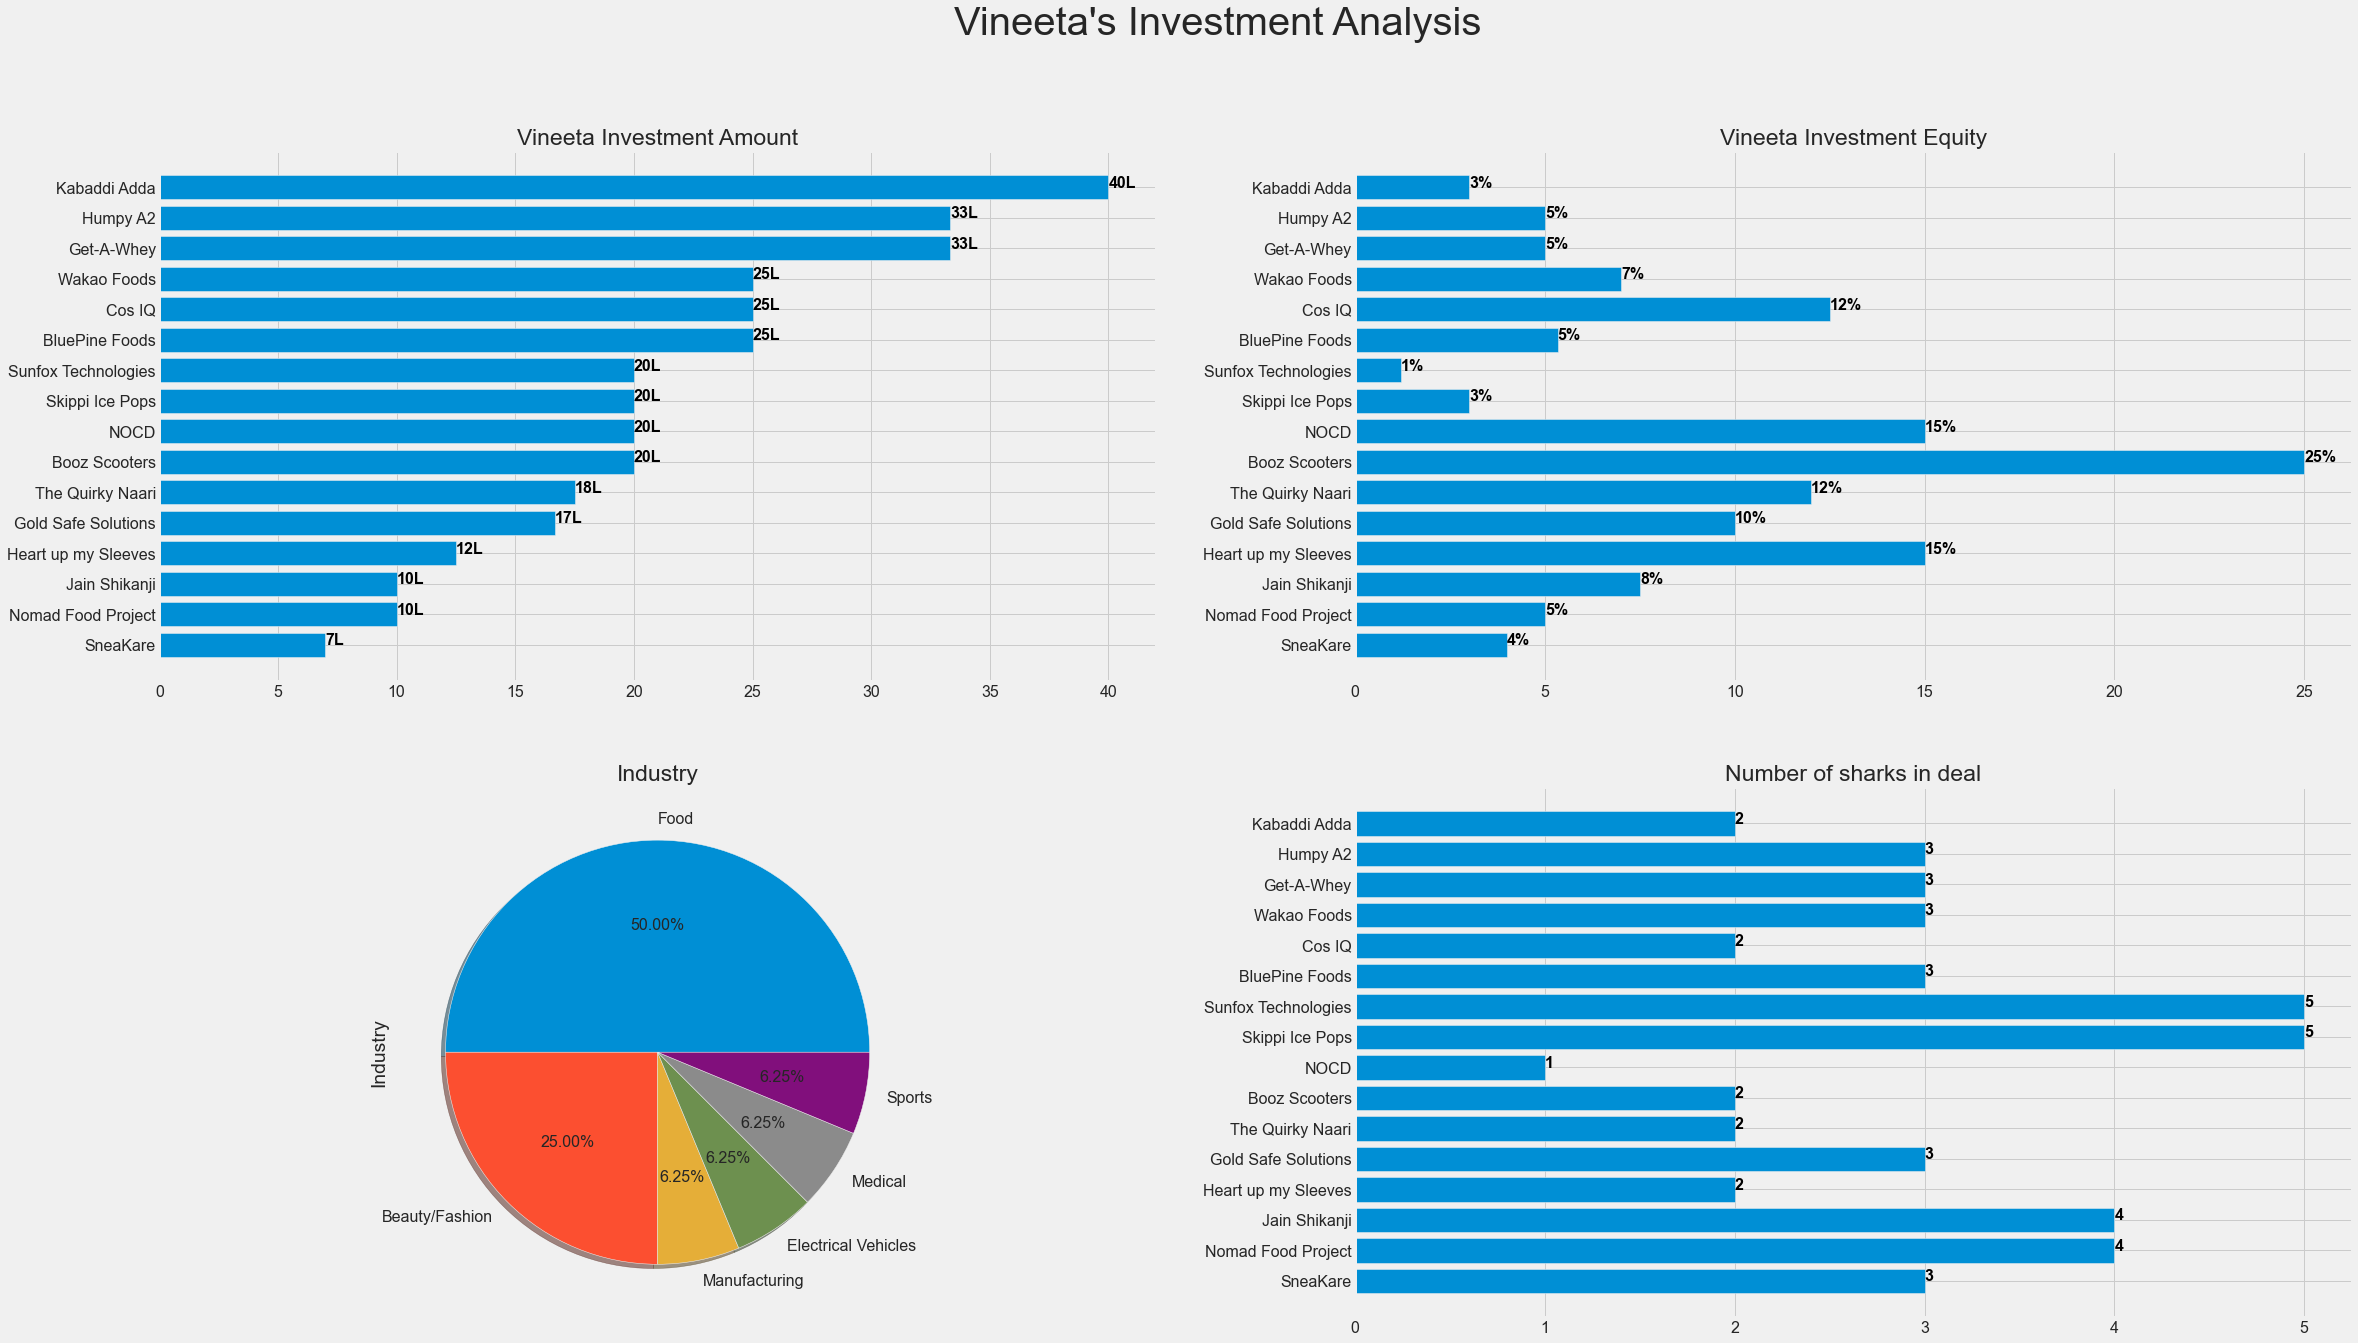

In [115]:
Vineeta = Vineeta_amount.sort_values('Vineeta Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Vineeta["Startup Name"],Vineeta["Vineeta Investment Amount"])
for i, v in enumerate(Vineeta["Vineeta Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Vineeta Investment Amount")
plt.subplot(2,2,2)
plt.barh(Vineeta["Startup Name"],Vineeta["Vineeta Investment Equity"])
for i, v in enumerate(Vineeta["Vineeta Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Vineeta Investment Equity")
plt.subplot(2,2,3)
Vineeta["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Vineeta["Startup Name"],Vineeta["Number of sharks in deal"])
for i, v in enumerate(Vineeta["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Vineeta's Investment Analysis",fontsize=40)

## Aman Investment Amount

Text(0.5, 0.98, "Aman's Investment Analysis")

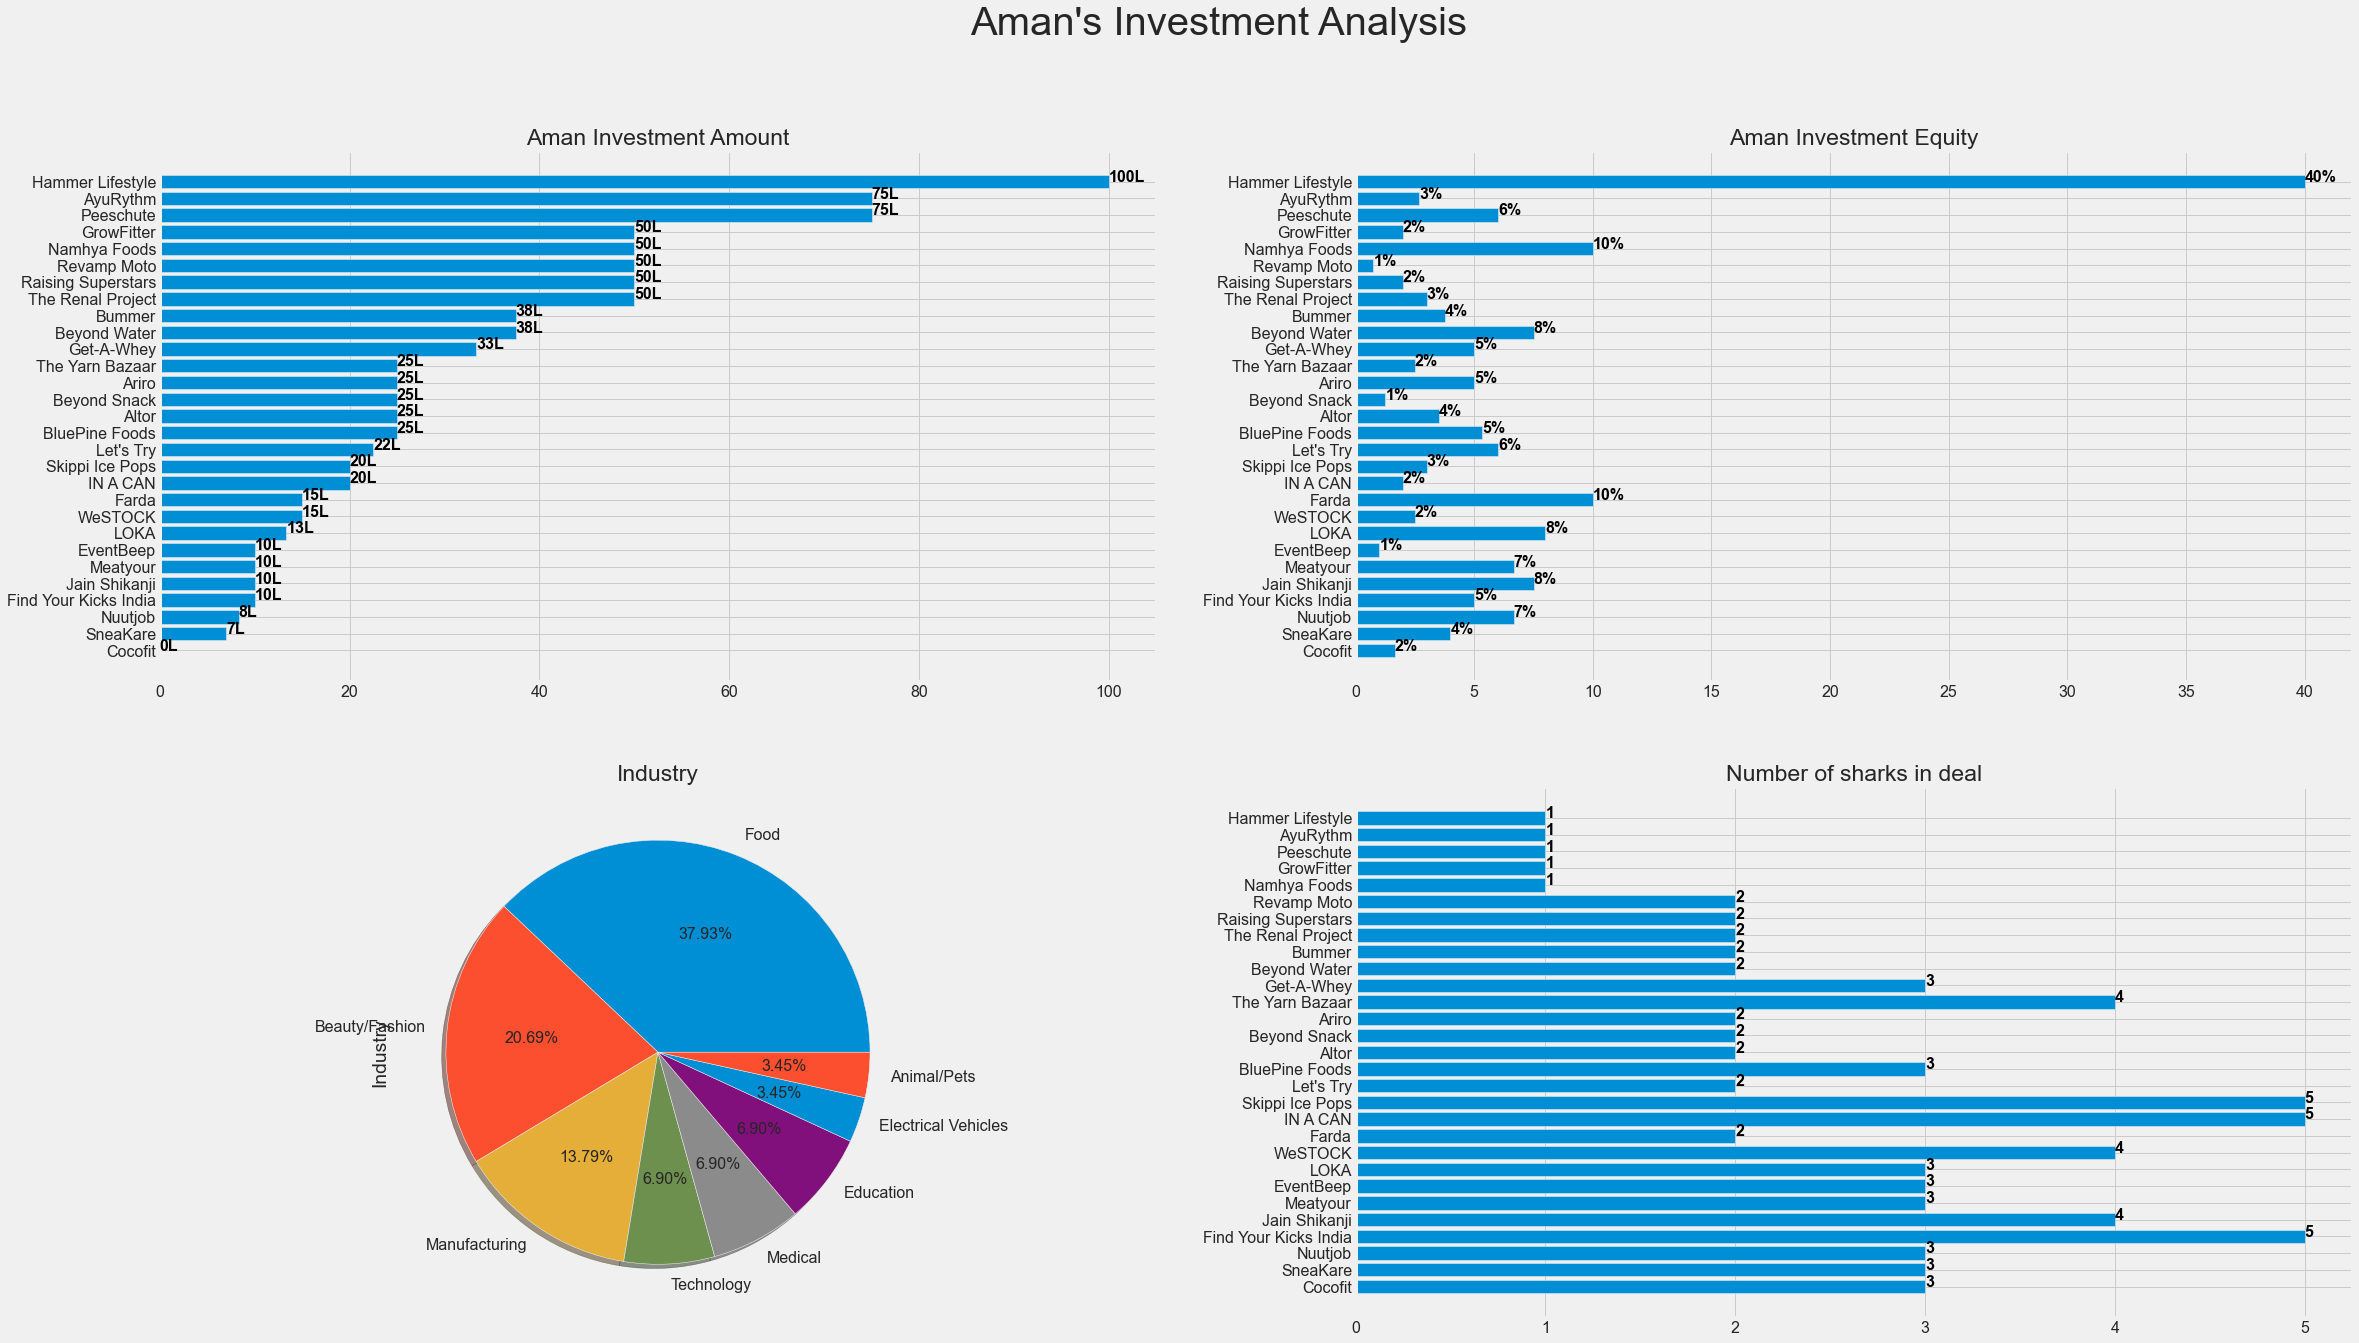

In [116]:
Aman = Aman_amount.sort_values('Aman Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Aman["Startup Name"],Aman["Aman Investment Amount"])
for i, v in enumerate(Aman["Aman Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Aman Investment Amount")
plt.subplot(2,2,2)
plt.barh(Aman["Startup Name"],Aman["Aman Investment Equity"])
for i, v in enumerate(Aman["Aman Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Aman Investment Equity")
plt.subplot(2,2,3)
Aman["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Aman["Startup Name"],Aman["Number of sharks in deal"])
for i, v in enumerate(Aman["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Aman's Investment Analysis",fontsize=40)

## Peyush Investment Amount

Text(0.5, 0.98, "Peyush's Investment Analysis")

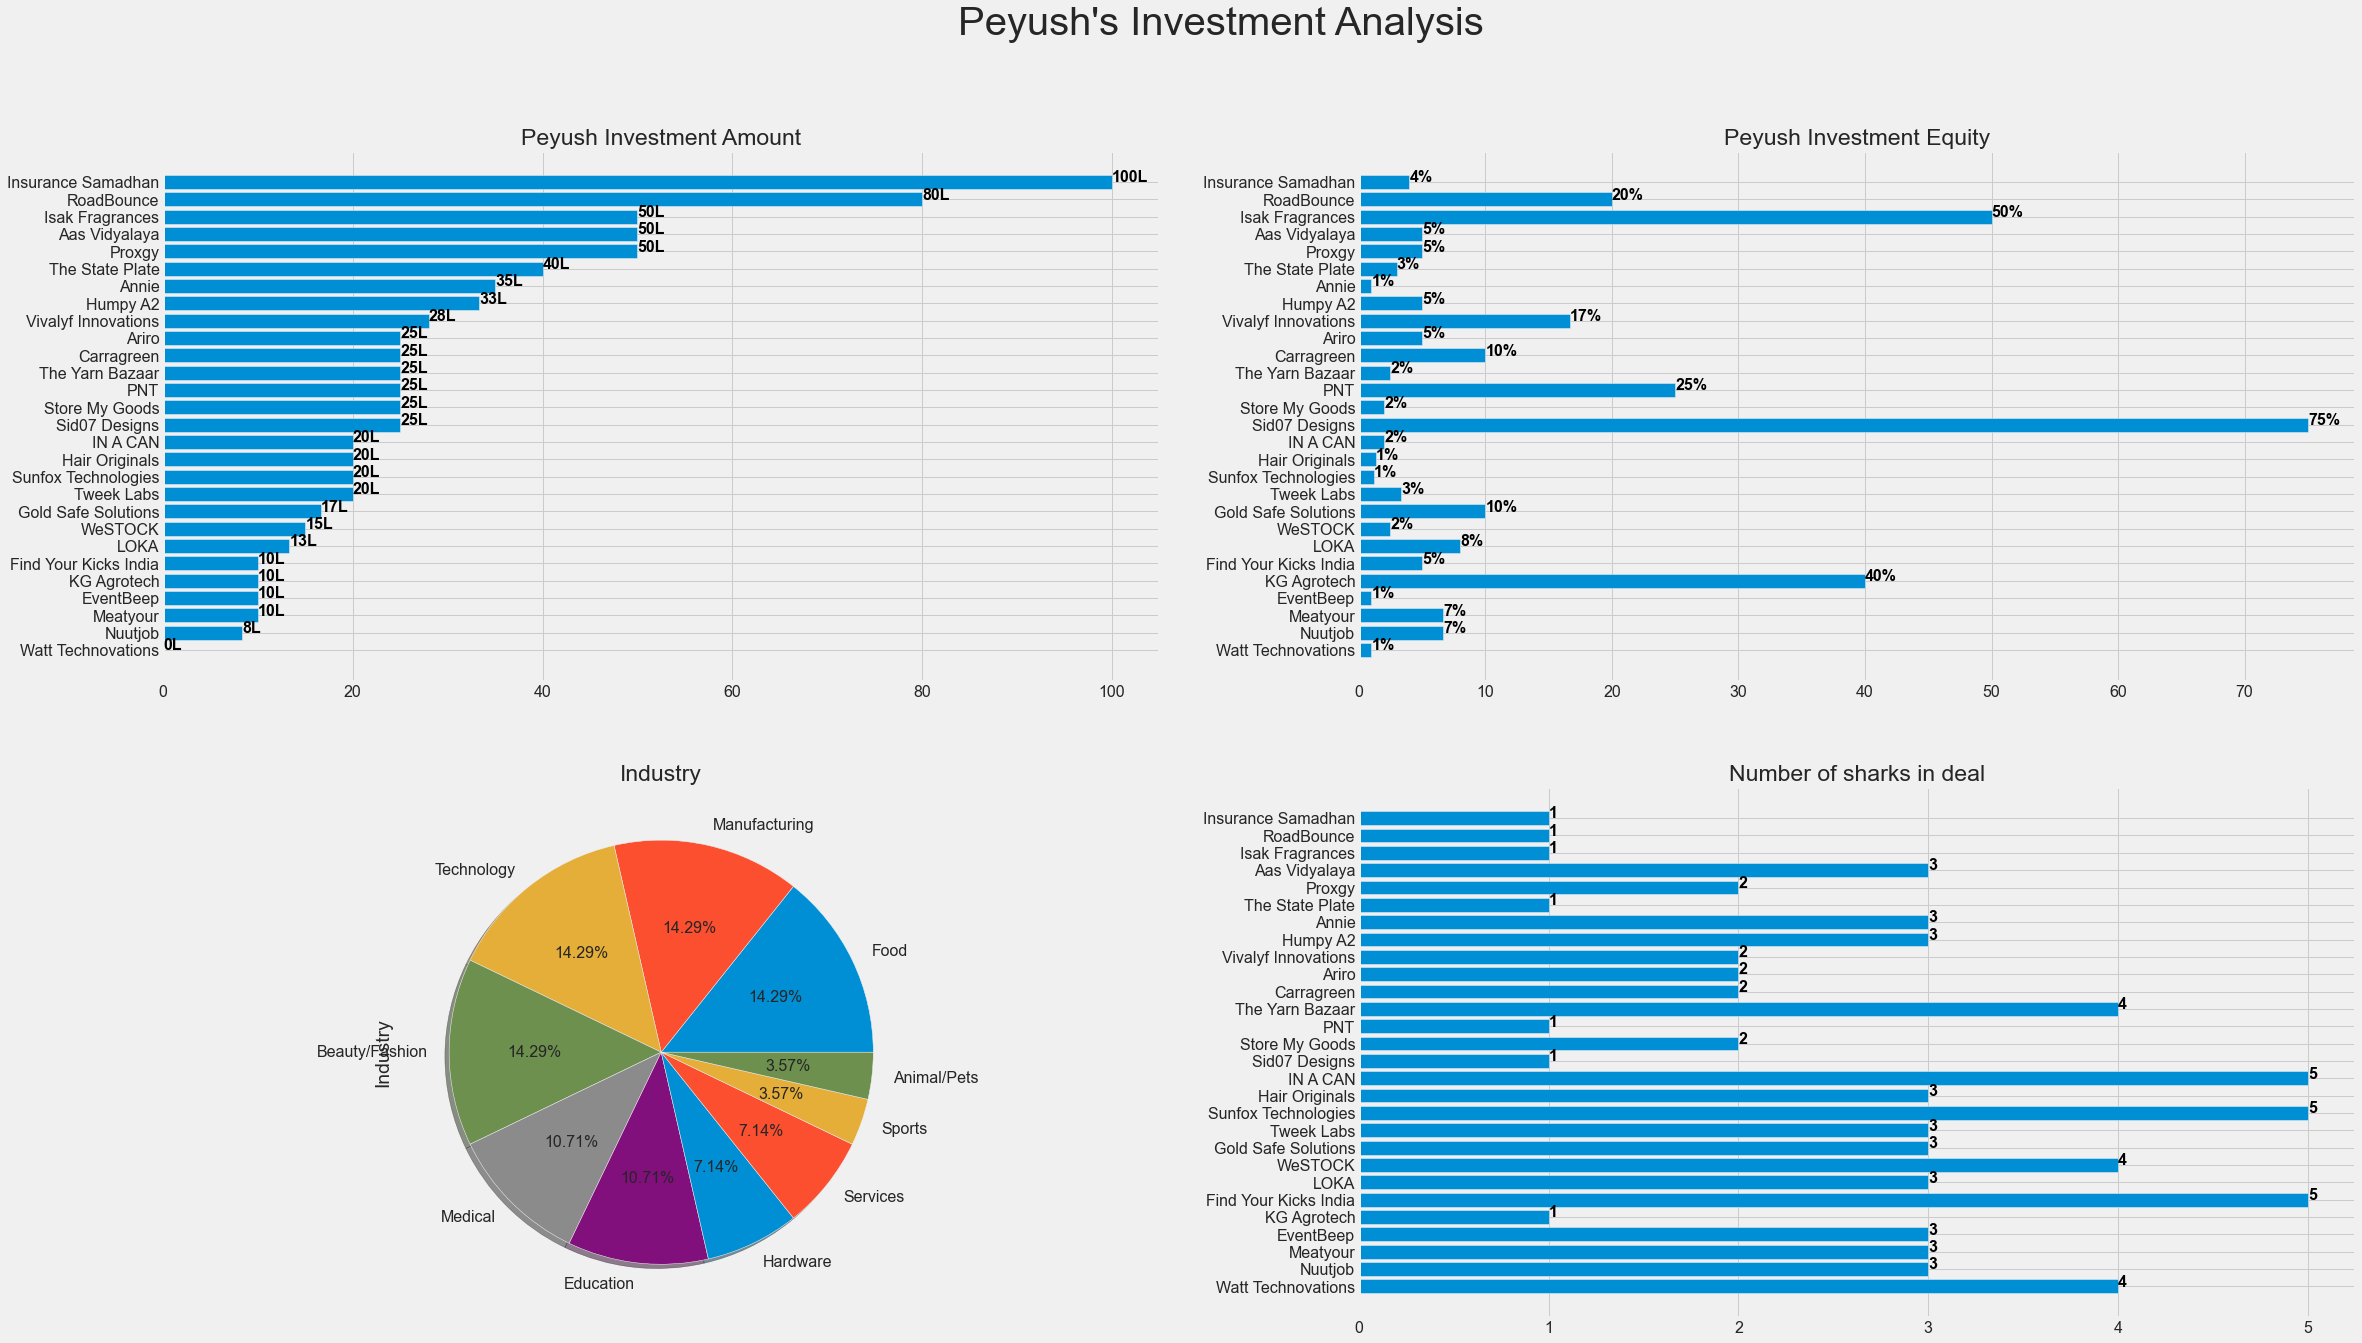

In [118]:
##Peyush's Investment Analysis
Peyush = Peyush_amount.sort_values('Peyush Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Peyush["Startup Name"],Peyush["Peyush Investment Amount"])
for i, v in enumerate(Peyush["Peyush Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Peyush Investment Amount")
plt.subplot(2,2,2)
plt.barh(Peyush["Startup Name"],Peyush["Peyush Investment Equity"])
for i, v in enumerate(Peyush["Peyush Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Peyush Investment Equity")
plt.subplot(2,2,3)
Peyush["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Peyush["Startup Name"],Peyush["Number of sharks in deal"])
for i, v in enumerate(Peyush["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Peyush's Investment Analysis",fontsize=40)

## Ghazal Investment Amount

Text(0.5, 0.98, "Ghazal's Investment Analysis")

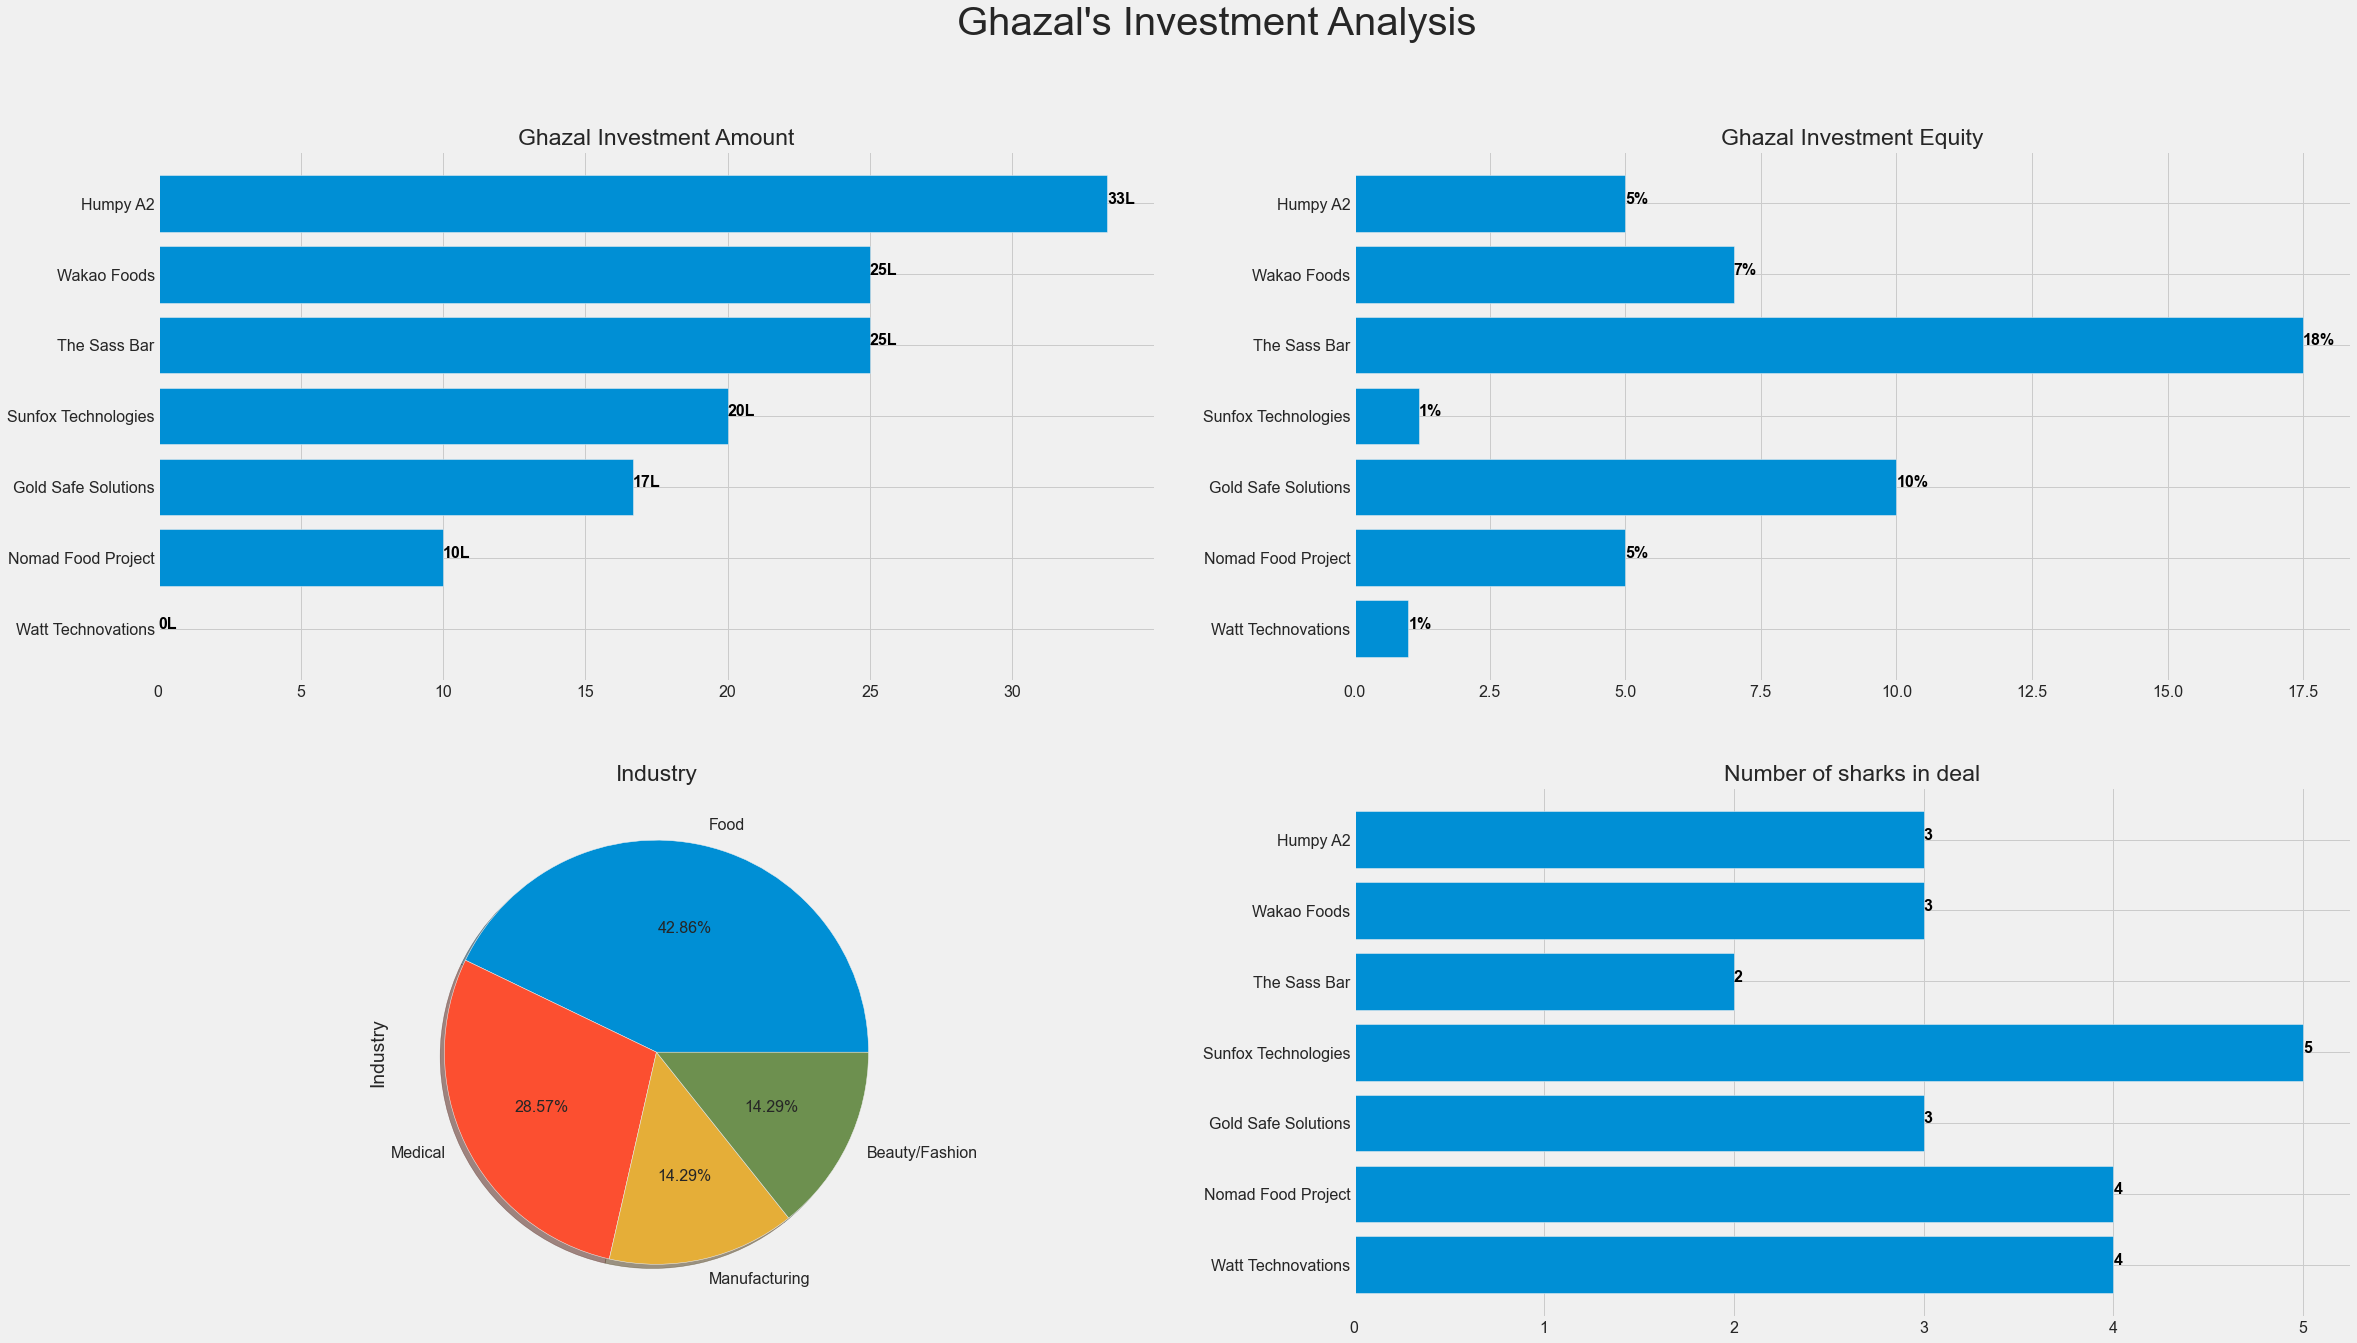

In [119]:
Ghazal = Ghazal_amount.sort_values('Ghazal Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Ghazal["Startup Name"],Ghazal["Ghazal Investment Amount"])
for i, v in enumerate(Ghazal["Ghazal Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Ghazal Investment Amount")
plt.subplot(2,2,2)
plt.barh(Ghazal["Startup Name"],Ghazal["Ghazal Investment Equity"])
for i, v in enumerate(Ghazal["Ghazal Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Ghazal Investment Equity")
plt.subplot(2,2,3)
Ghazal["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Ghazal["Startup Name"],Ghazal["Number of sharks in deal"])
for i, v in enumerate(Ghazal["Number of sharks in deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of sharks in deal")
plt.suptitle("Ghazal's Investment Analysis",fontsize=40)